# HOUSING: PRICE PREDICTION 

Data Description

Import Required Liabraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Load the train data. 

In [2]:
df=pd.read_csv('housingtrain.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [4]:
pd.set_option('display.max_columns',82) #this function helps to view all the columns.

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [6]:
df.shape   #pandas.shape function shows how many columns and rows in the given train data.

(1168, 81)

In [7]:
df.info() #pandas.info shows the datatype and null values in the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

[]

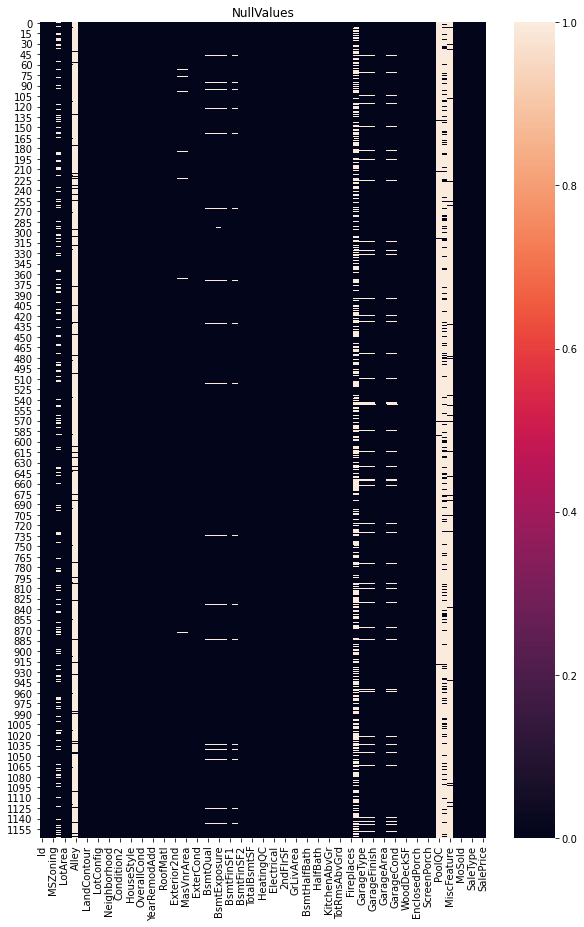

In [8]:
plt.figure(figsize=(10,15))
sns.heatmap(df.isnull())
plt.title('NullValues')
plt.plot()

Descriptive Statistics

In [9]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1104.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,46.647260,569.721747,1061.095034,1169.860445,348.826199,6.380137,1525.066781,0.425514,0.055651,1.562500,0.388699,2.884418,1.045377,6.542808,0.617295,1978.193841,1.776541,476.860445,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,163.520016,449.375525,442.272249,391.161983,439.696370,50.892844,528.042957,0.521615,0.236699,0.551882,0.504929,0.817229,0.216292,1.598484,0.650575,24.890704,0.745554,214.466769,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,216.000000,799.000000,892.000000,0.000000,0.000000,1143.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,0.000000,474.000000,1005.500000,1096.500000,0.000000,0.000000,1468.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,0.000000,816.000000,1291.500000,1392.000000,729.000000,0.000000,1795.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# EDA

Visualization of categorical data

In [10]:
categoircal=['MSZoning','Street', 'Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType', 'HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical', 'KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']

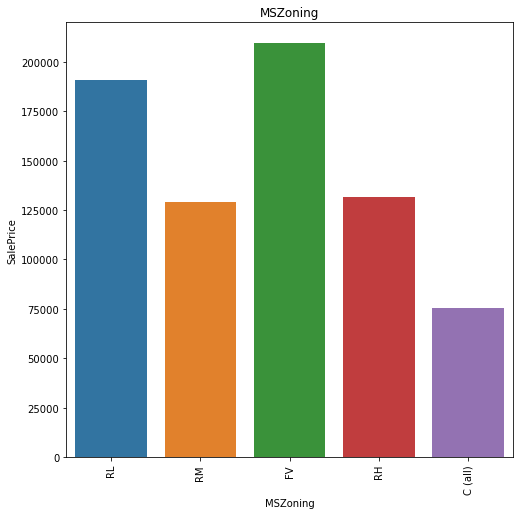

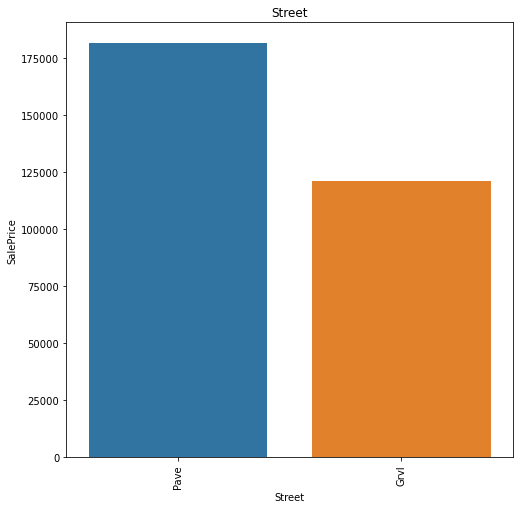

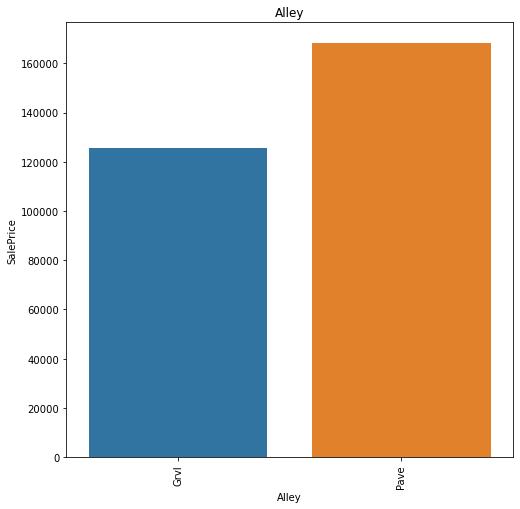

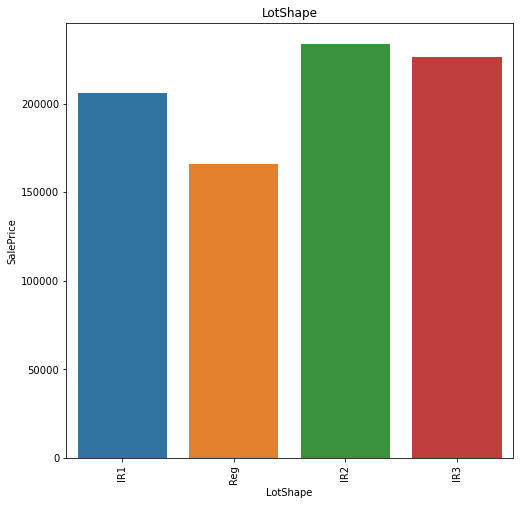

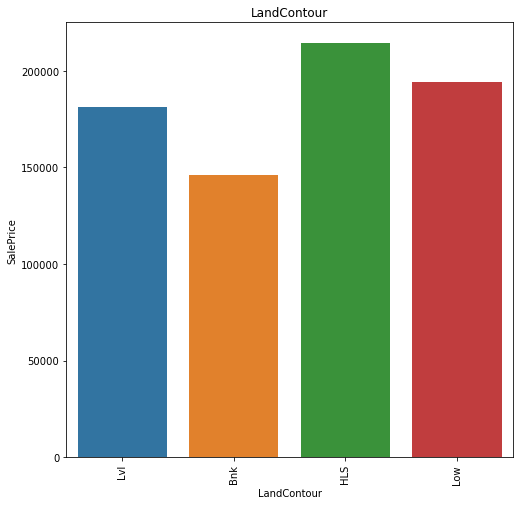

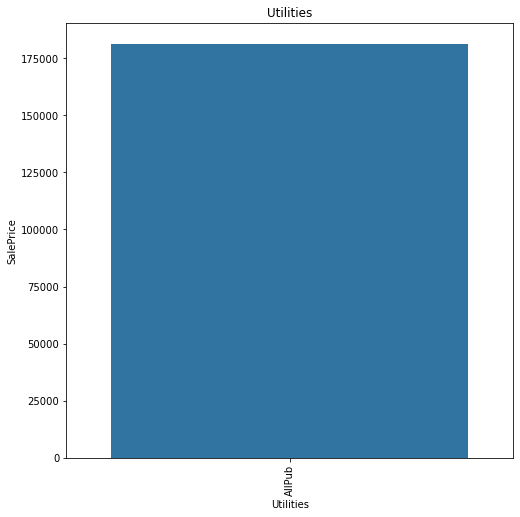

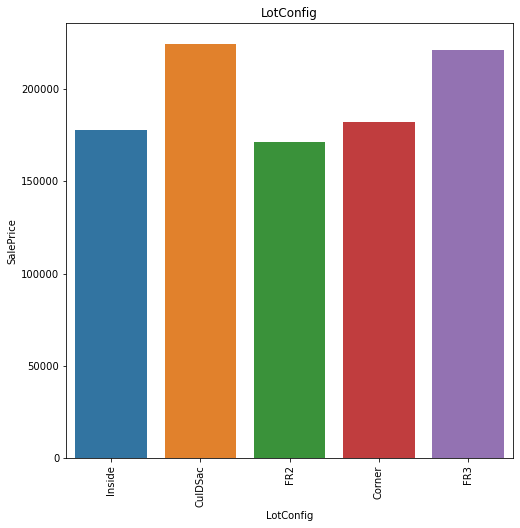

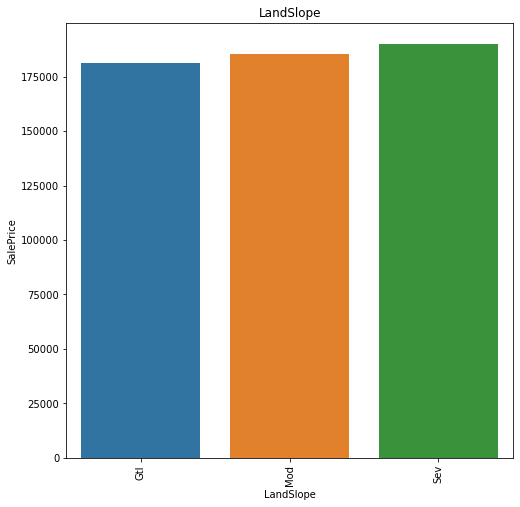

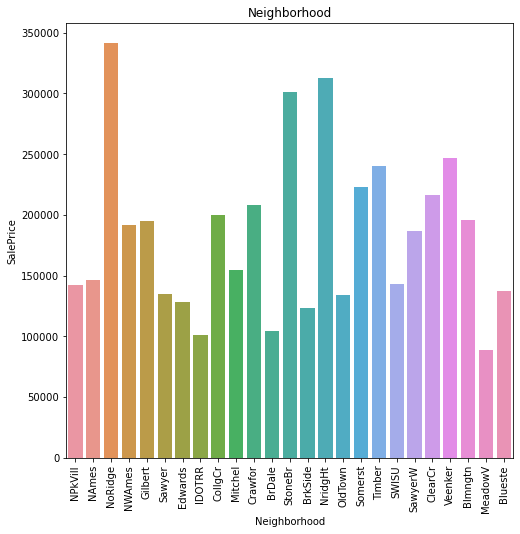

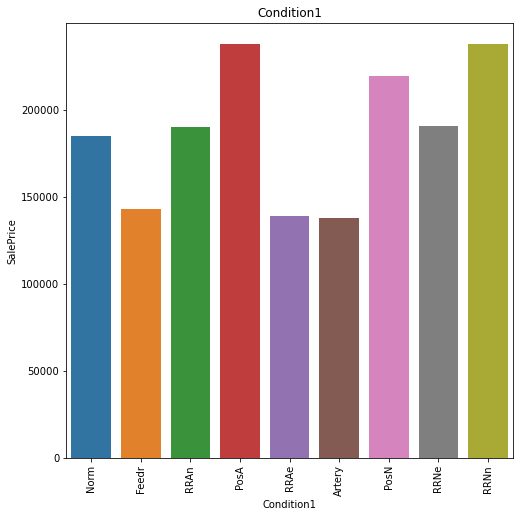

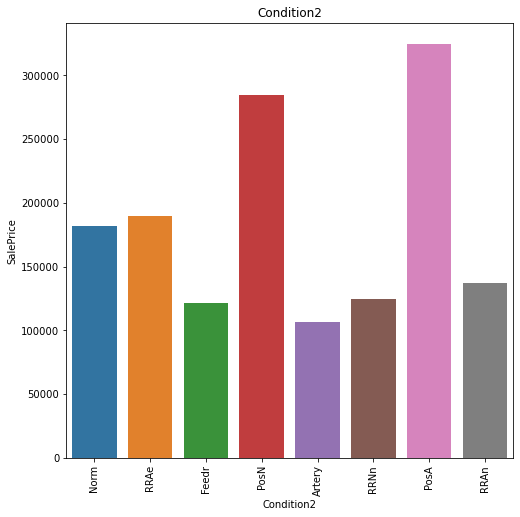

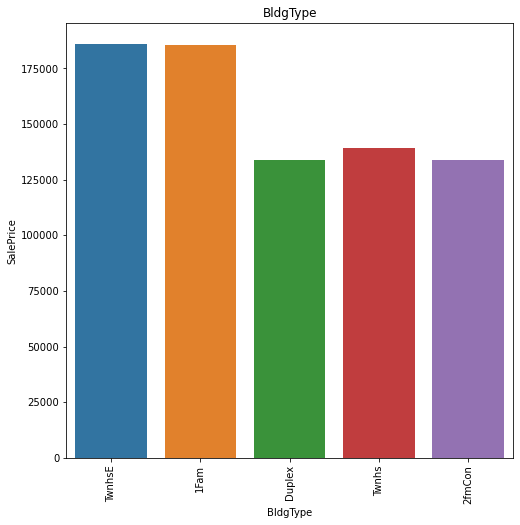

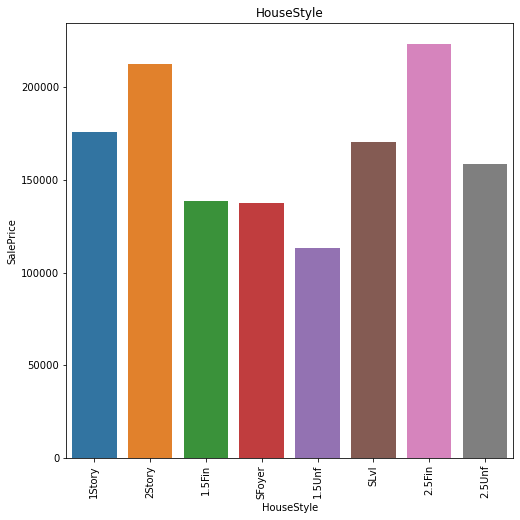

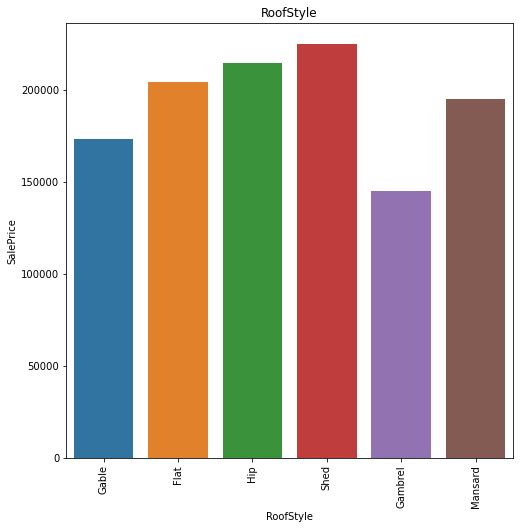

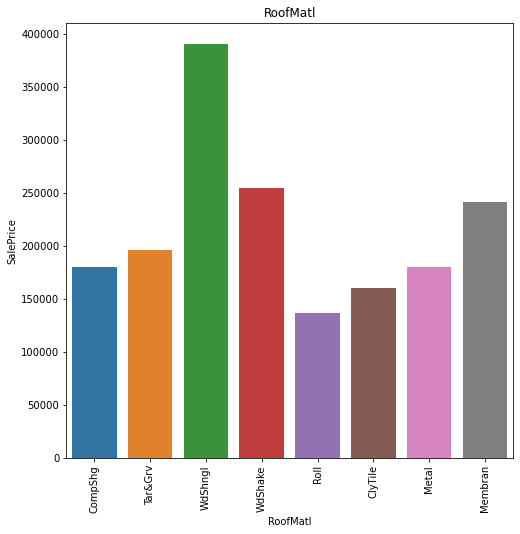

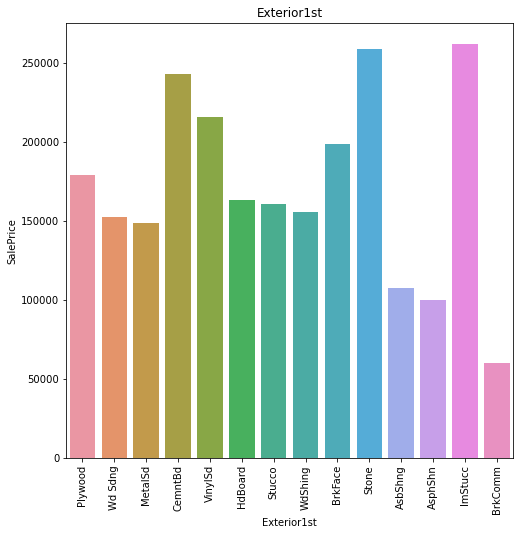

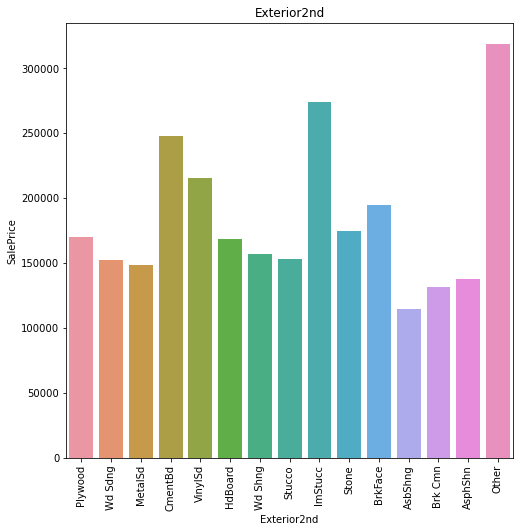

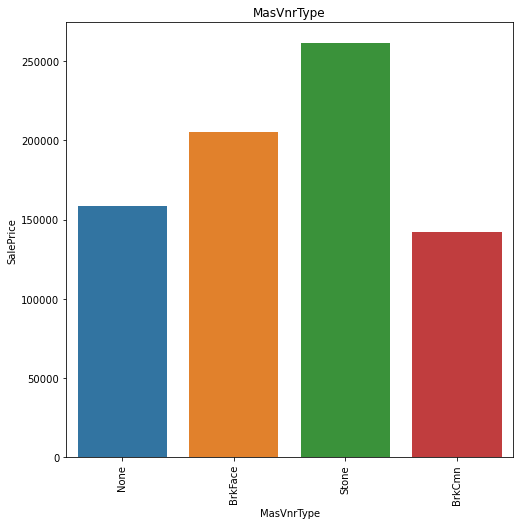

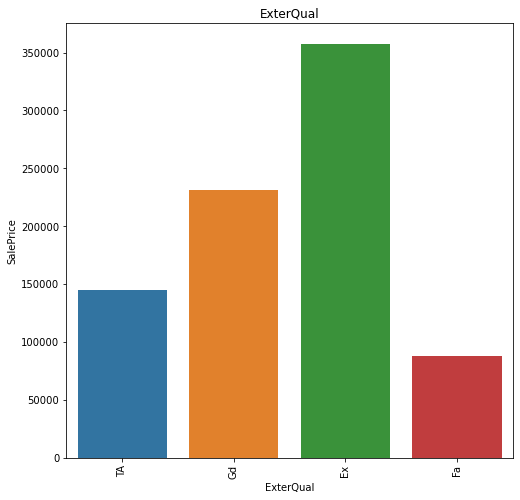

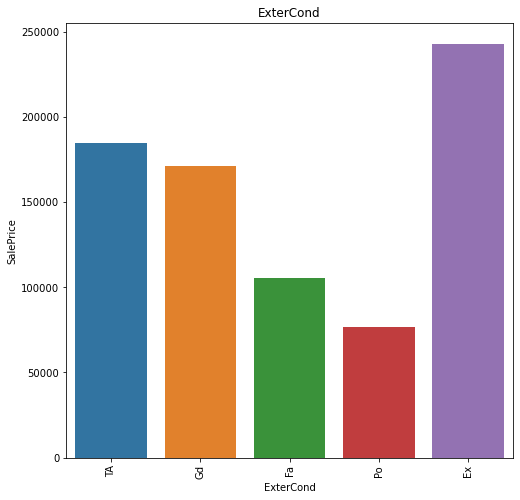

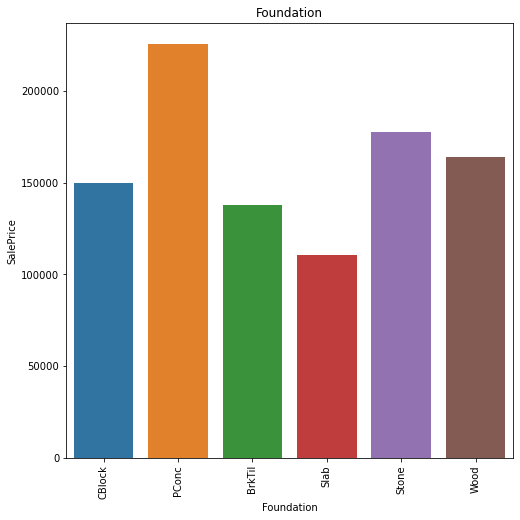

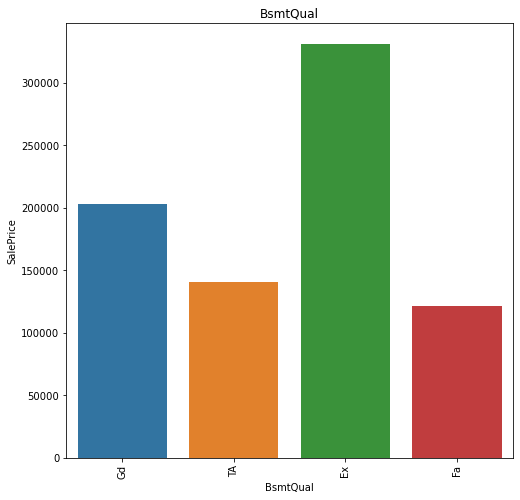

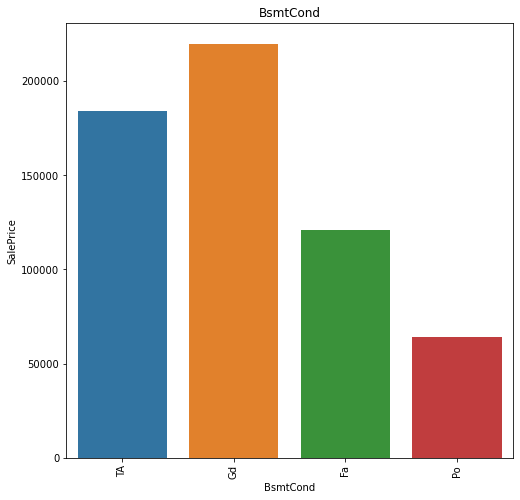

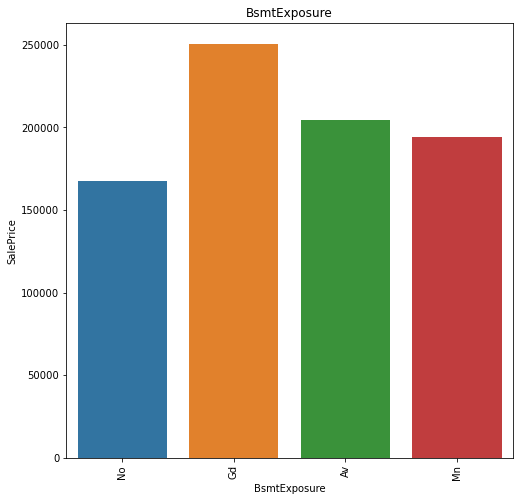

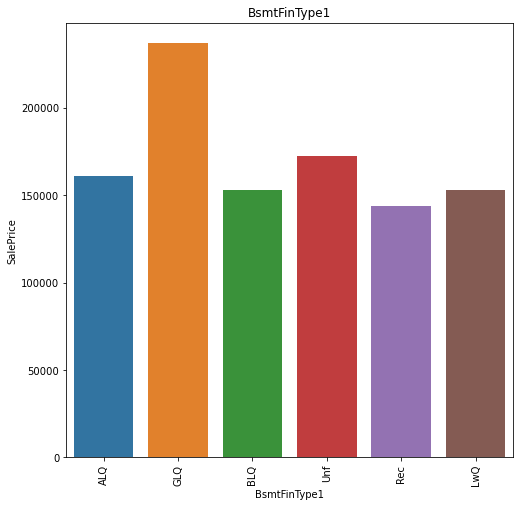

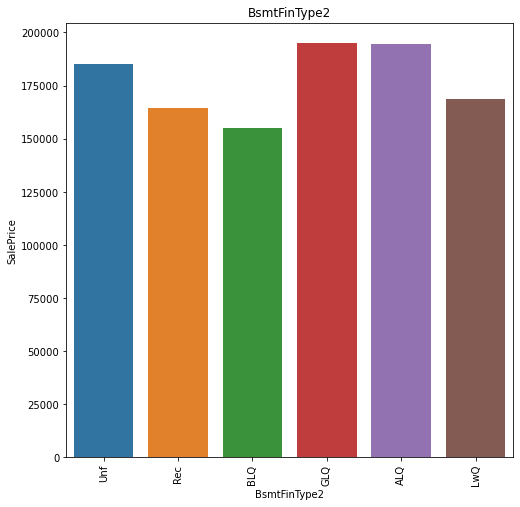

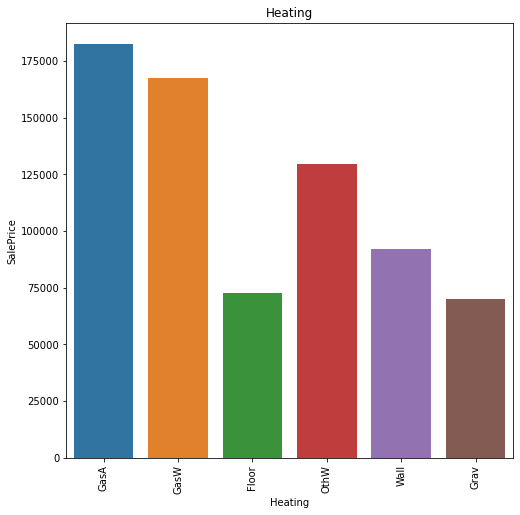

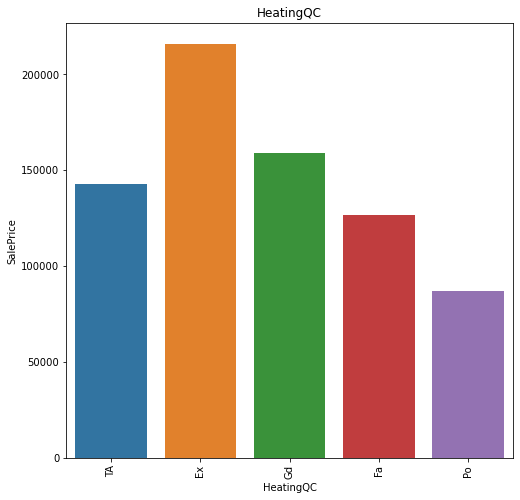

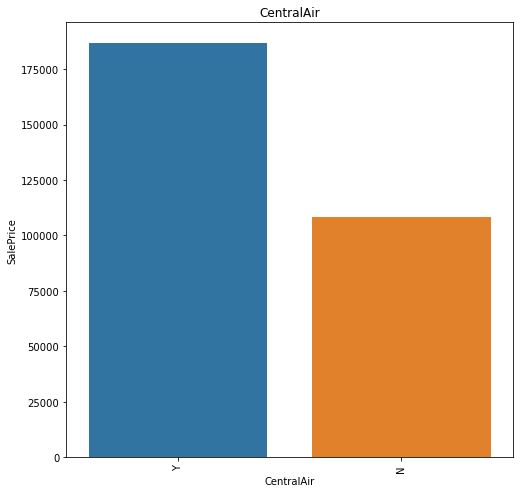

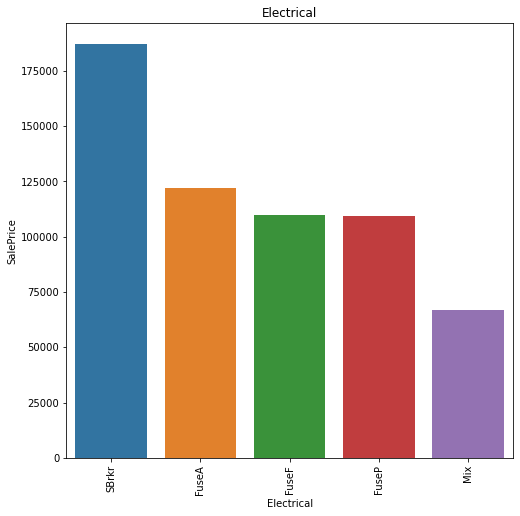

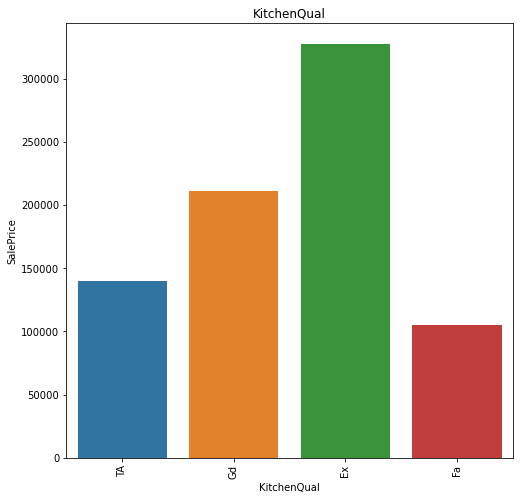

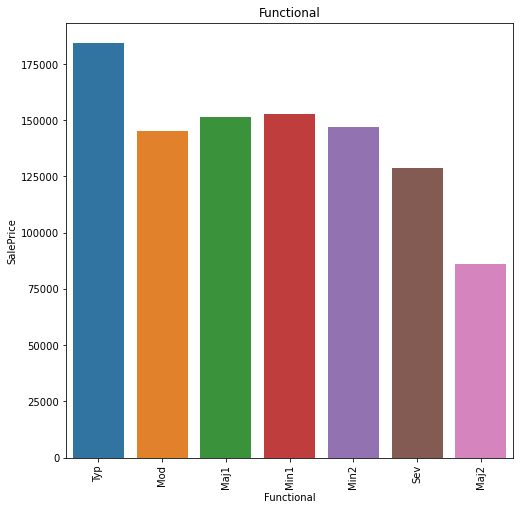

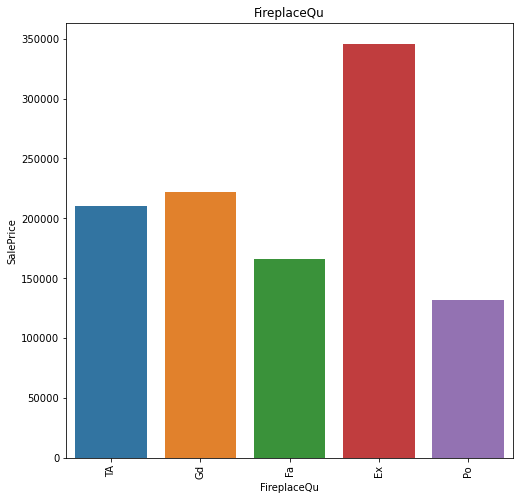

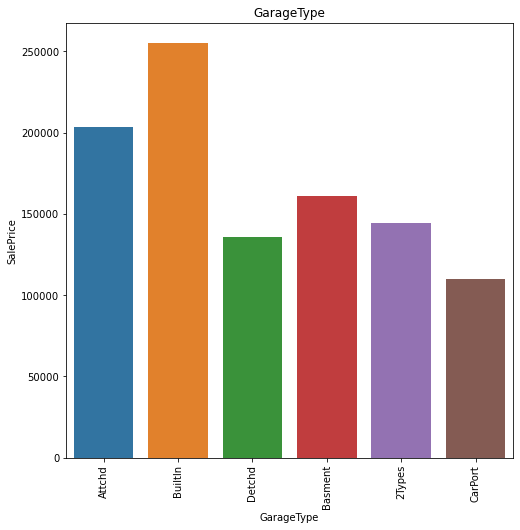

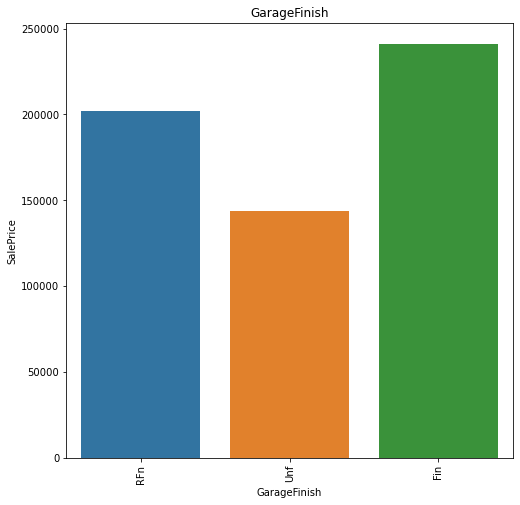

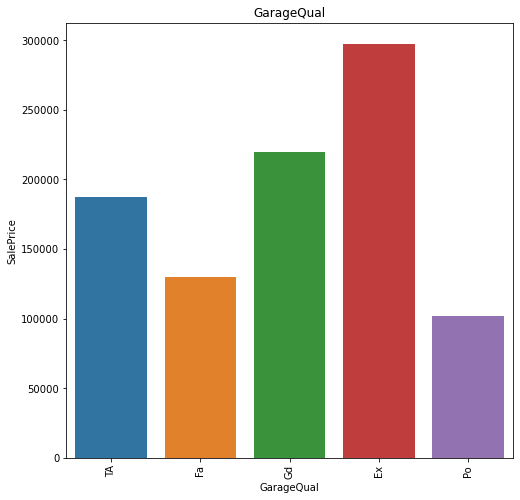

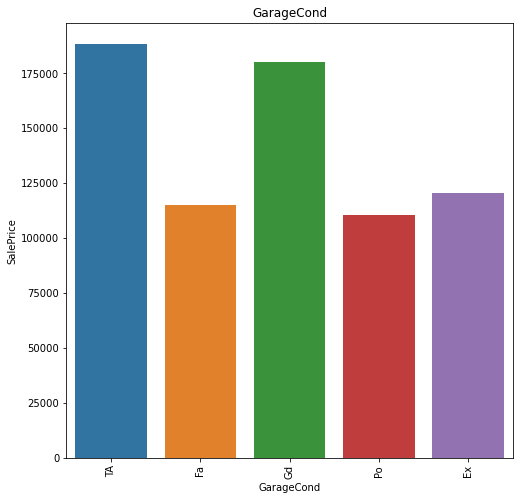

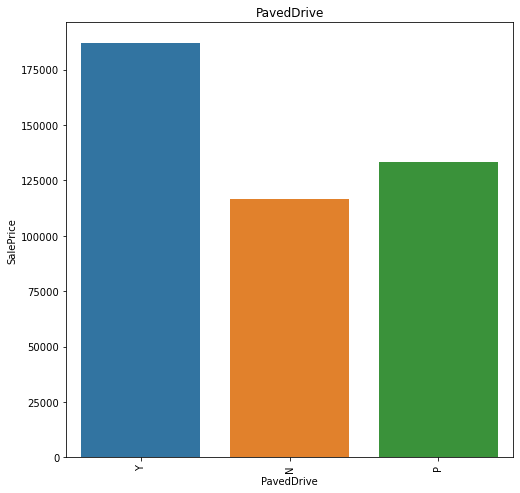

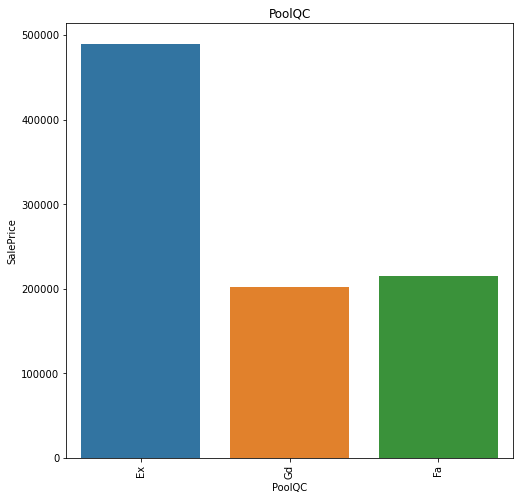

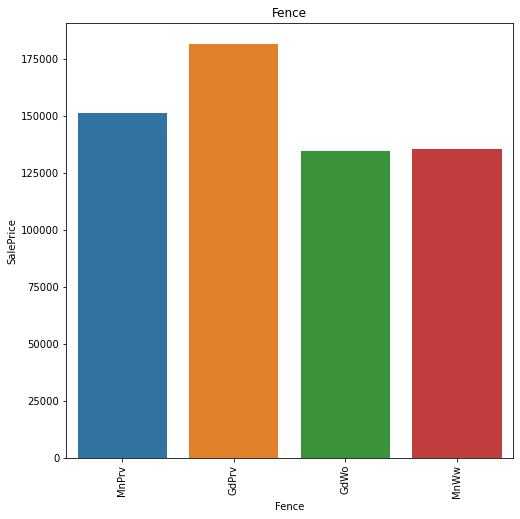

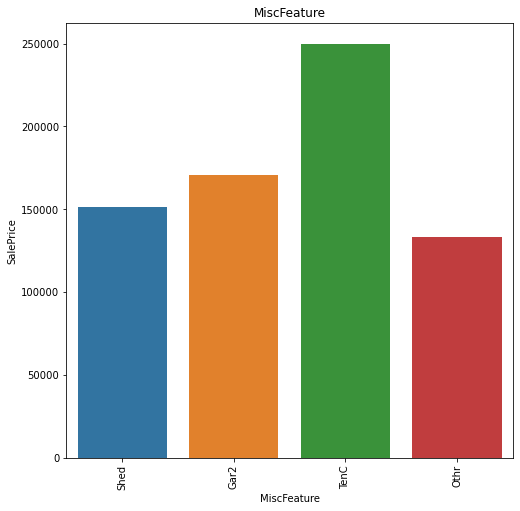

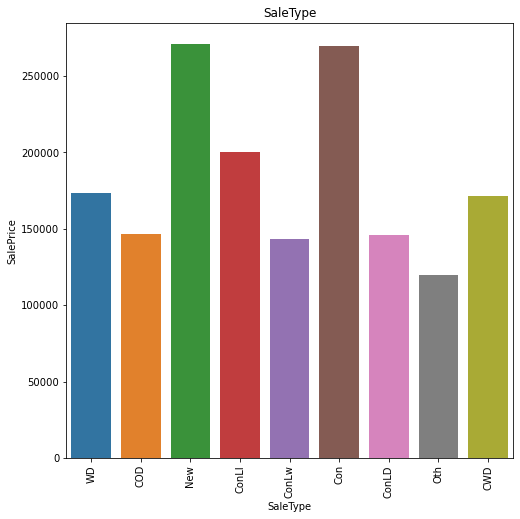

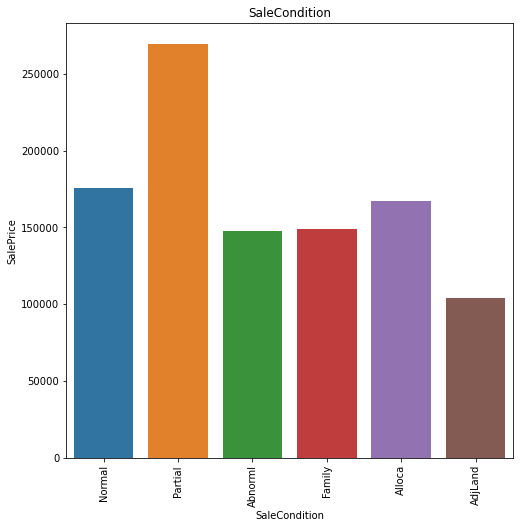

In [11]:
for m in categoircal:
    plt.figure(figsize=(8,8))
    plt.title(m)
    sns.barplot(x=m,y='SalePrice',data=df,ci=None)
    plt.xticks(rotation=90)
    plt.show()

Visualization of Numercial data

In [12]:
corr=df.corr()

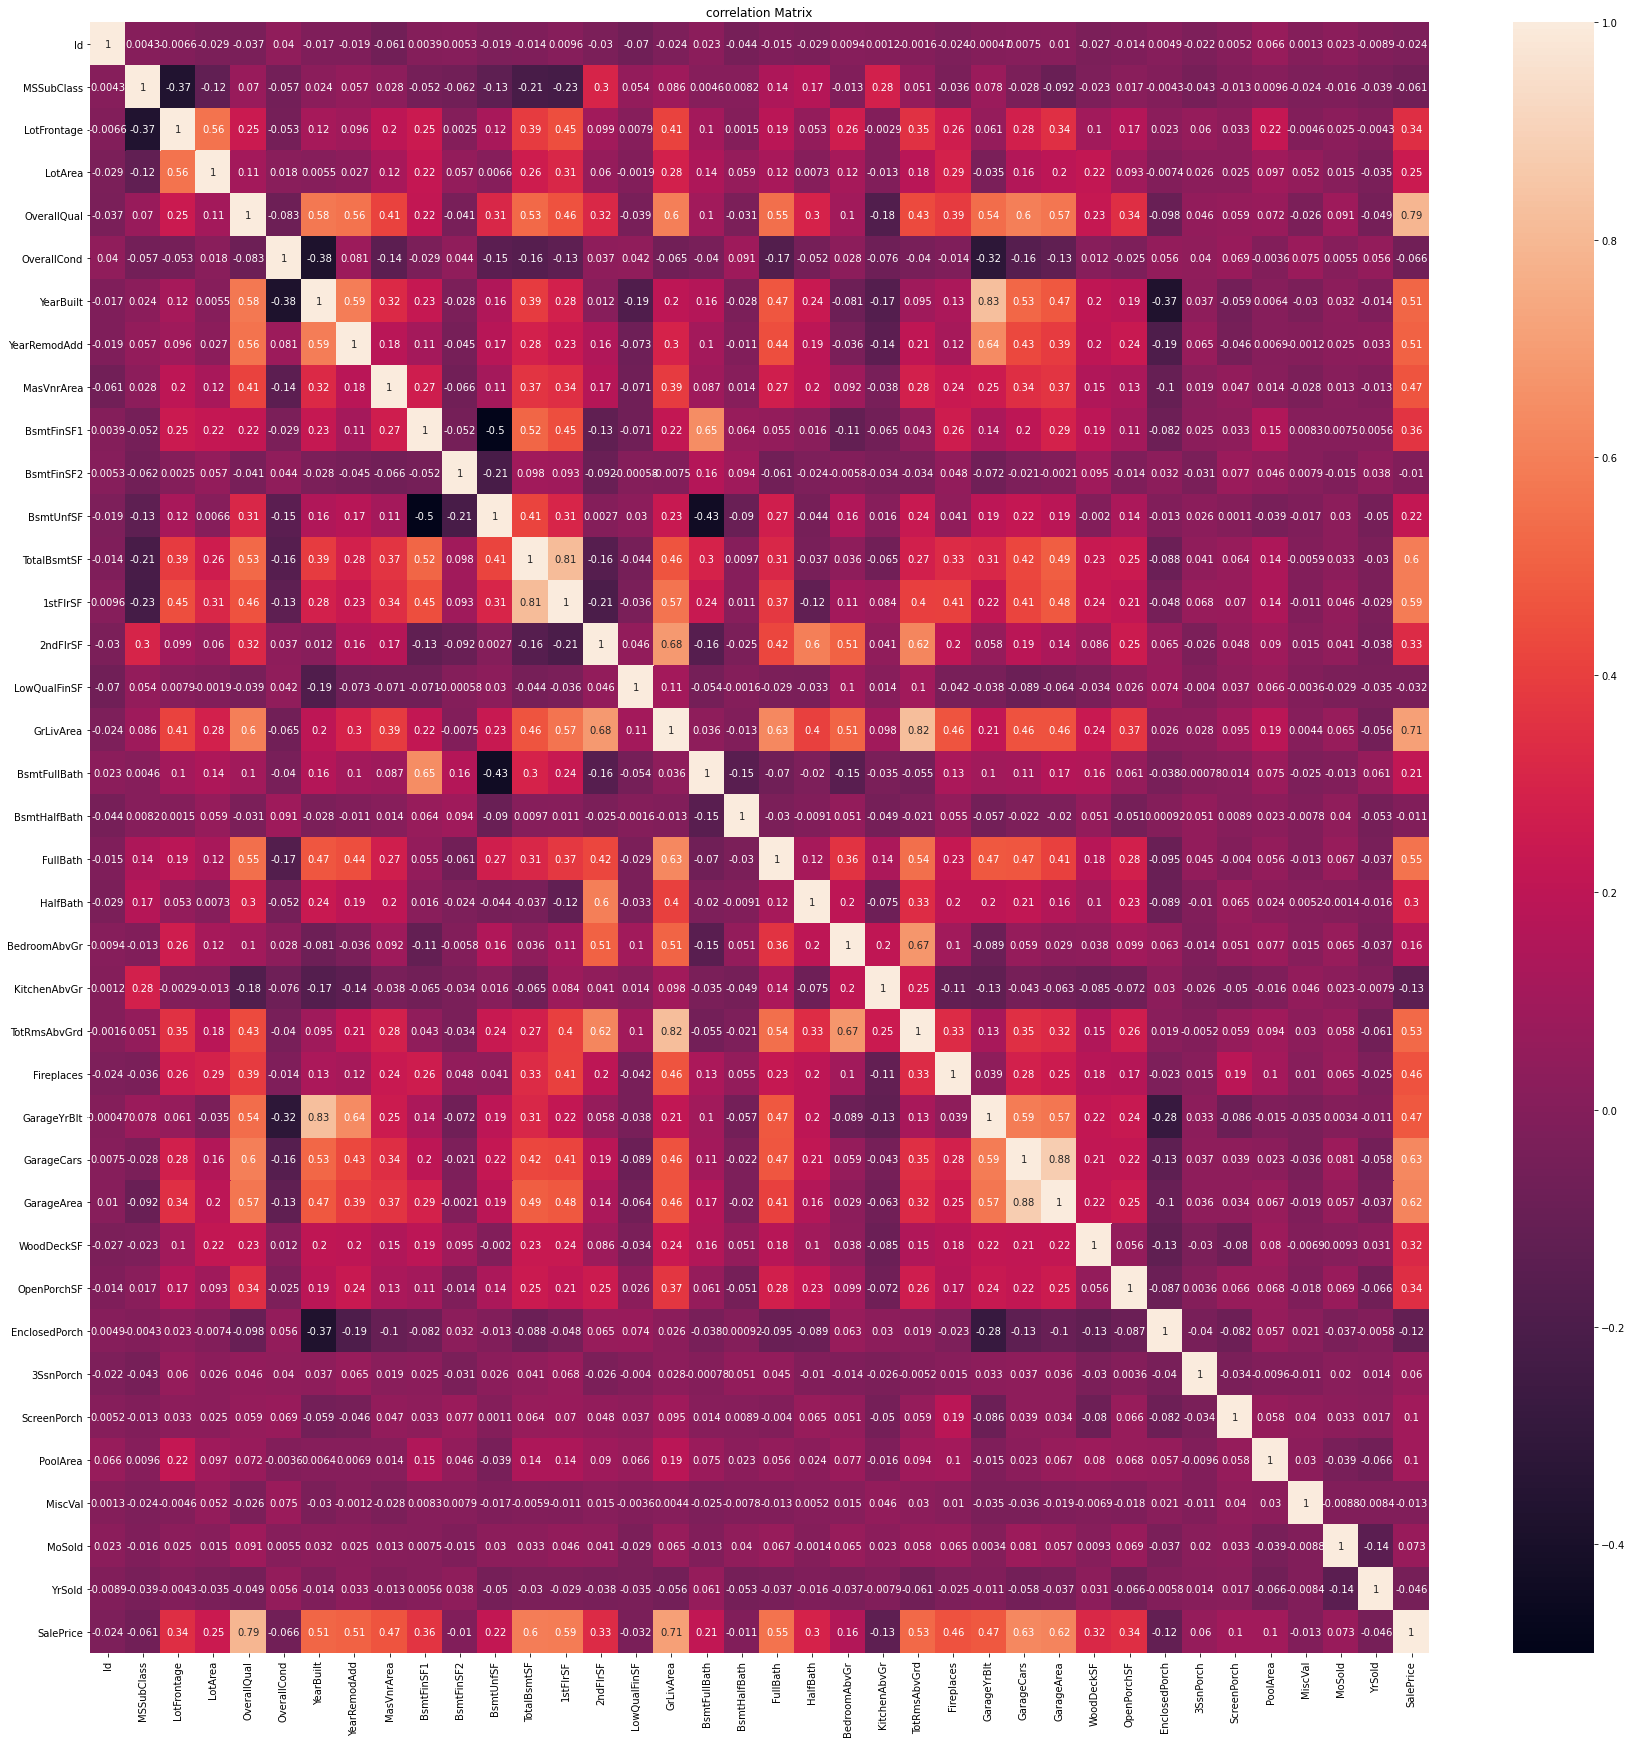

In [13]:
plt.figure(figsize=(30,30))
sns.heatmap(corr,annot=True)
plt.title('correlation Matrix')
plt.show()

Main Observations from the Visualization part.

# DATA CLEANING

Handling Missing Values

Numerical (continous) data missing values. 

In [14]:
from sklearn.impute import SimpleImputer

In [15]:
imp= SimpleImputer(missing_values=np.nan, strategy='mean')

In [16]:
df['LotFrontage']=imp.fit_transform(df['LotFrontage'].values.reshape(-1,1))
df['MasVnrArea']=imp.fit_transform(df['MasVnrArea'].values.reshape(-1,1))


Categoircal and numerical columns with limited values not more than 10, data missing values.

In [17]:
imp= SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [18]:
df['MasVnrType']=imp.fit_transform(df['MasVnrType'].values.reshape(-1,1))
df['BsmtQual']=imp.fit_transform(df['BsmtQual'].values.reshape(-1,1))
df['BsmtCond']=imp.fit_transform(df['BsmtCond'].values.reshape(-1,1))
df['BsmtExposure']=imp.fit_transform(df['BsmtExposure'].values.reshape(-1,1))
df['BsmtFinType1']=imp.fit_transform(df['BsmtFinType1'].values.reshape(-1,1))
df['BsmtFinType2']=imp.fit_transform(df['BsmtFinType2'].values.reshape(-1,1))
df['FireplaceQu']=imp.fit_transform(df['FireplaceQu'].values.reshape(-1,1))
df['GarageType']=imp.fit_transform(df['GarageType'].values.reshape(-1,1))
df['GarageYrBlt']=imp.fit_transform(df['GarageYrBlt'].values.reshape(-1,1))
df['GarageFinish']=imp.fit_transform(df['GarageFinish'].values.reshape(-1,1))
df['GarageQual']=imp.fit_transform(df['GarageQual'].values.reshape(-1,1))
df['GarageCond']=imp.fit_transform(df['GarageCond'].values.reshape(-1,1))

In [19]:
df.drop(['Id','PoolQC','Fence','MiscFeature','Alley','Utilities'],axis=1,inplace=True)

Treaing skewness.

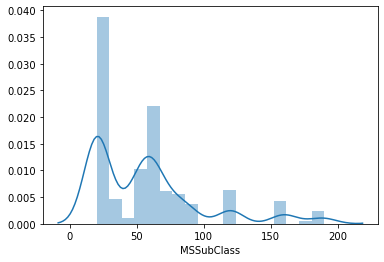

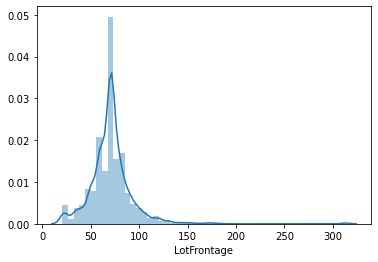

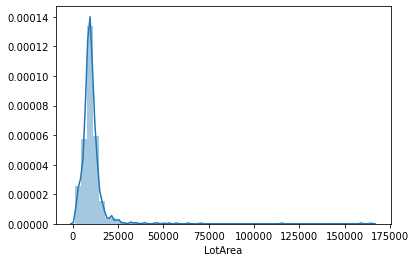

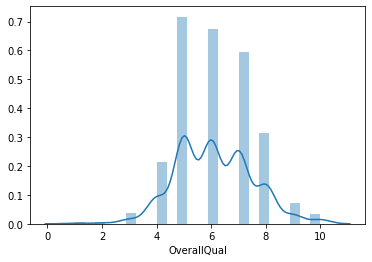

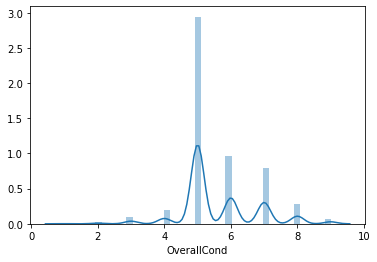

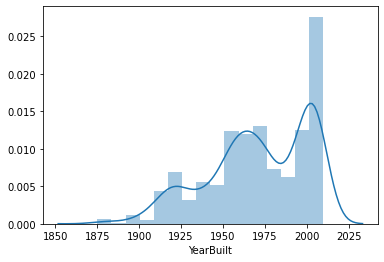

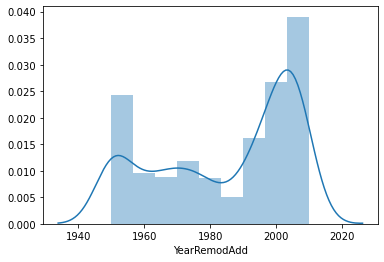

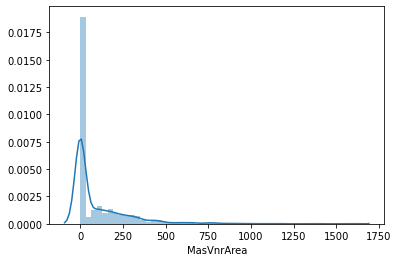

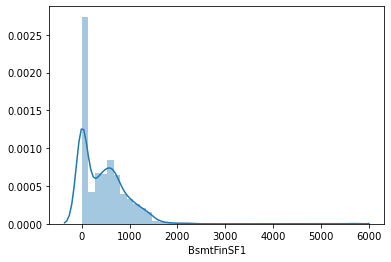

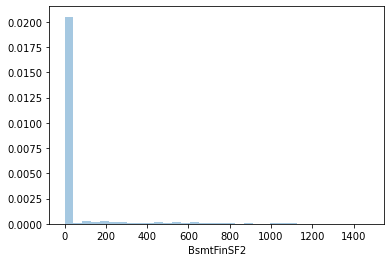

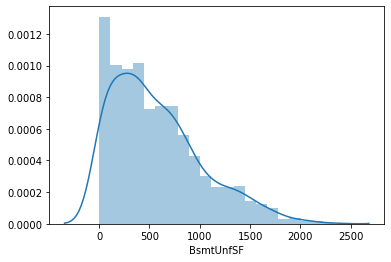

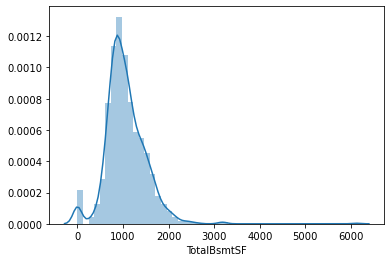

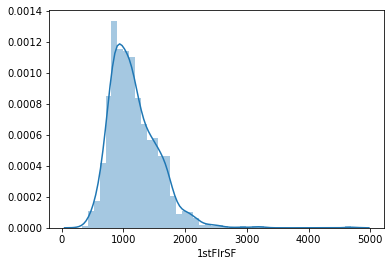

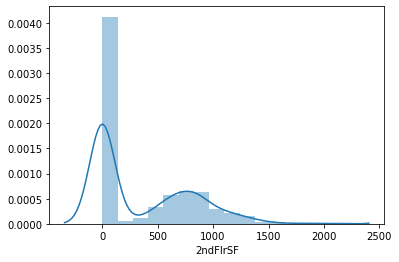

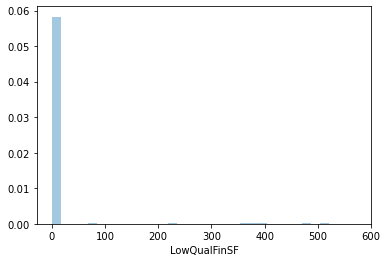

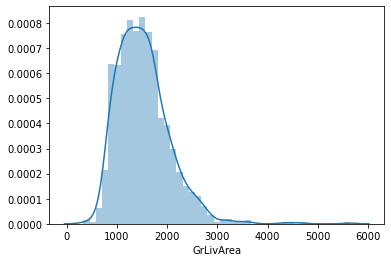

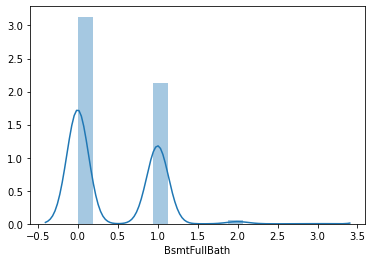

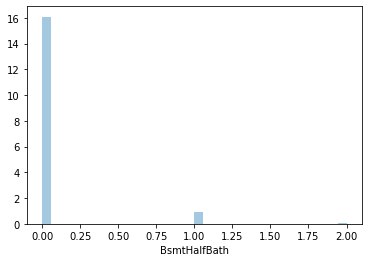

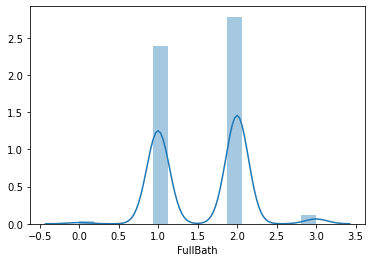

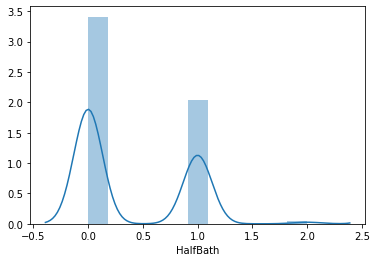

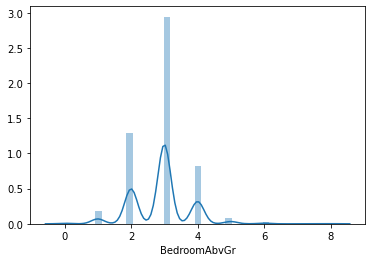

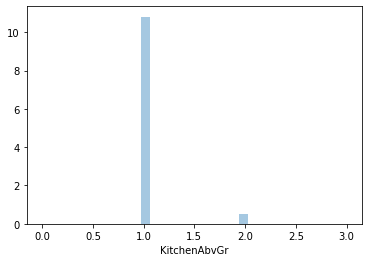

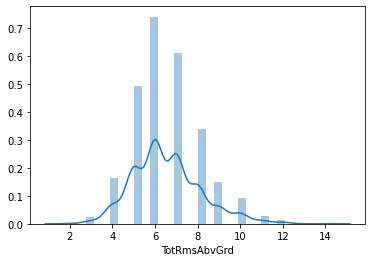

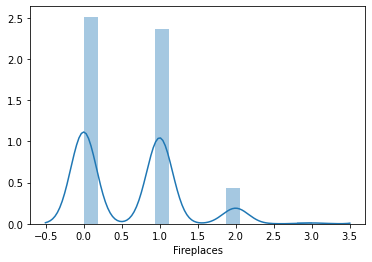

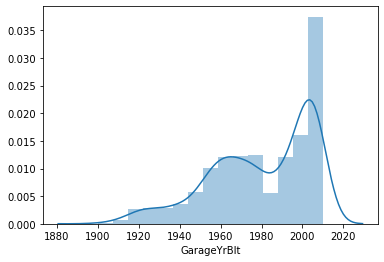

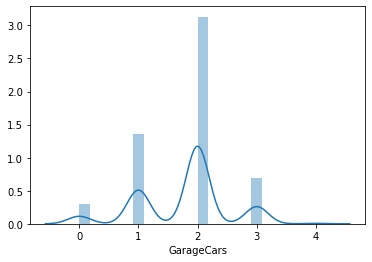

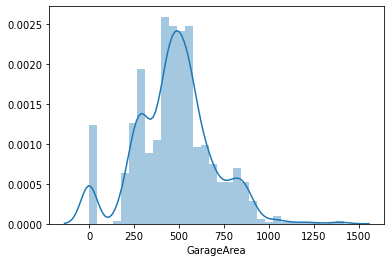

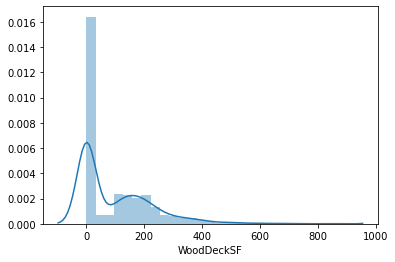

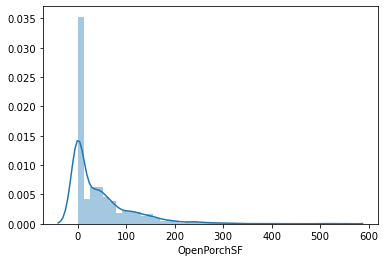

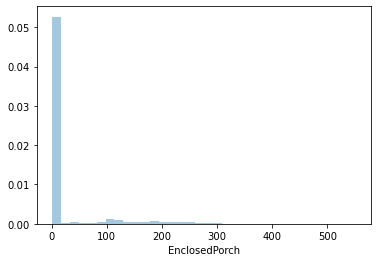

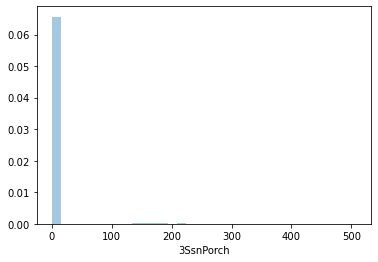

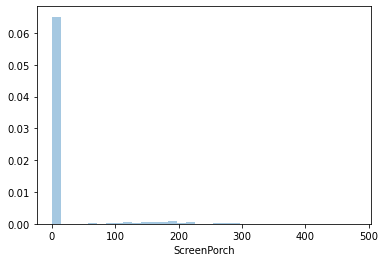

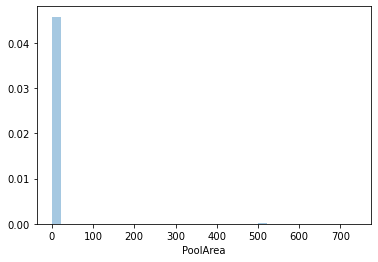

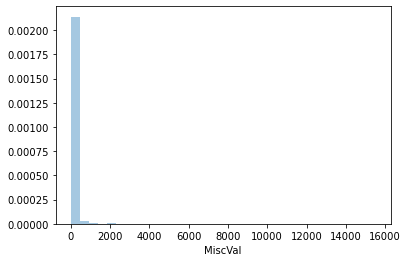

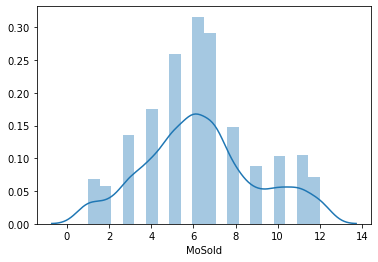

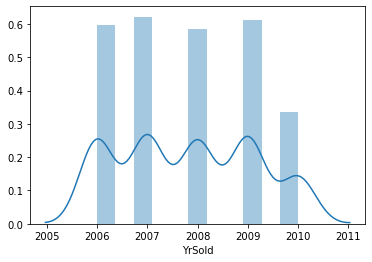

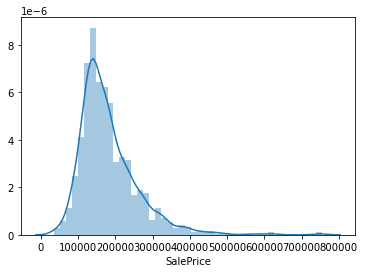

In [20]:
for i in df.describe().columns:
    sns.distplot(df[i].dropna())
    plt.show()

In [21]:
df.skew()

MSSubClass        1.422019
LotFrontage       2.710383
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        2.834658
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageYrBlt      -0.708074
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
SalePrice         1.953878
d

Methods to remove skewness.

In [22]:
#first we will apply log transformation and add contest for the columns which min value is 0.

In [23]:
df_log=pd.DataFrame({})
df_log['MSSubClass']=np.log(df['MSSubClass'])
df_log['LotFrontage']=np.log(df['LotFrontage'])
df_log['LotArea']=np.log(df['LotArea'])
df_log['MasVnrArea']=np.log(df['MasVnrArea']+1)
df_log['BsmtFinSF1']=np.log(df['BsmtFinSF1']+1)
df_log['BsmtFinSF2']=np.log(df['BsmtFinSF2']+1)
df_log['BsmtUnfSF']=np.log(df['BsmtUnfSF']+1)
df_log['TotalBsmtSF']=np.log(df['TotalBsmtSF']+1)
df_log['1stFlrSF']=np.log(df['1stFlrSF'])
df_log['2ndFlrSF']=np.log(df['2ndFlrSF']+1)
df_log['LowQualFinSF']=np.log(df['LowQualFinSF']+1)
df_log['GrLivArea']=np.log(df['GrLivArea'])
df_log['BsmtFullBath']=np.log(df['BsmtFullBath']+1)
df_log['BsmtHalfBath']=np.log(df['BsmtHalfBath']+1)
df_log['HalfBath']=np.log(df['HalfBath']+1)
df_log['KitchenAbvGr']=np.log(df['KitchenAbvGr']+1)
df_log['TotRmsAbvGrd']=np.log(df['TotRmsAbvGrd'])
df_log['TotalBsmtSF']=np.log(df['TotalBsmtSF']+1)
df_log['Fireplaces']=np.log(df['Fireplaces']+1)
df_log['WoodDeckSF']=np.log(df['WoodDeckSF']+1)
df_log['OpenPorchSF']=np.log(df['OpenPorchSF']+1)
df_log['EnclosedPorch']=np.log(df['EnclosedPorch']+1)
df_log['3SsnPorch']=np.log(df['3SsnPorch']+1)
df_log['ScreenPorch']=np.log(df['ScreenPorch']+1)
df_log['PoolArea']=np.log(df['PoolArea']+1)
df_log['MiscVal']=np.log(df['MiscVal']+1)

In [24]:
df_log.skew()

MSSubClass        0.218780
LotFrontage      -0.855745
LotArea          -0.169680
MasVnrArea        0.494344
BsmtFinSF1       -0.606859
BsmtFinSF2        2.502785
BsmtUnfSF        -2.129882
TotalBsmtSF      -5.146574
1stFlrSF          0.104816
2ndFlrSF          0.289335
LowQualFinSF      7.090715
GrLivArea         0.000555
BsmtFullBath      0.430791
BsmtHalfBath      4.049438
HalfBath          0.543681
KitchenAbvGr      3.678394
TotRmsAbvGrd     -0.204537
Fireplaces        0.188280
WoodDeckSF        0.131075
OpenPorchSF      -0.004279
EnclosedPorch     2.079610
3SsnPorch         7.196594
ScreenPorch       3.104665
PoolArea         12.826713
MiscVal           5.159109
dtype: float64

In [25]:
#Square root transformation

In [26]:
df_sqr=pd.DataFrame({})
df_sqr['MSSubClass']=np.sqrt(df['MSSubClass'])
df_sqr['LotFrontage']=np.sqrt(df['LotFrontage'])
df_sqr['LotArea']=np.sqrt(df['LotArea'])
df_sqr['MasVnrArea']=np.sqrt(df['MasVnrArea'])
df_sqr['BsmtFinSF1']=np.sqrt(df['BsmtFinSF1'])
df_sqr['BsmtFinSF2']=np.sqrt(df['BsmtFinSF2'])
df_sqr['BsmtUnfSF']=np.sqrt(df['BsmtUnfSF'])
df_sqr['TotalBsmtSF']=np.sqrt(df['TotalBsmtSF'])
df_sqr['1stFlrSF']=np.sqrt(df['1stFlrSF'])
df_sqr['2ndFlrSF']=np.sqrt(df['2ndFlrSF'])
df_sqr['LowQualFinSF']=np.sqrt(df['LowQualFinSF'])
df_sqr['GrLivArea']=np.sqrt(df['GrLivArea'])
df_sqr['BsmtFullBath']=np.sqrt(df['BsmtFullBath'])
df_sqr['BsmtHalfBath']=np.sqrt(df['BsmtHalfBath'])
df_sqr['HalfBath']=np.sqrt(df['HalfBath'])
df_sqr['KitchenAbvGr']=np.sqrt(df['KitchenAbvGr'])
df_sqr['TotRmsAbvGrd']=np.sqrt(df['TotRmsAbvGrd'])
df_sqr['TotalBsmtSF']=np.sqrt(df['TotalBsmtSF'])
df_sqr['Fireplaces']=np.sqrt(df['Fireplaces'])
df_sqr['WoodDeckSF']=np.sqrt(df['WoodDeckSF'])
df_sqr['OpenPorchSF']=np.sqrt(df['OpenPorchSF'])
df_sqr['EnclosedPorch']=np.sqrt(df['EnclosedPorch'])
df_sqr['3SsnPorch']=np.sqrt(df['3SsnPorch'])
df_sqr['ScreenPorch']=np.sqrt(df['ScreenPorch'])
df_sqr['PoolArea']=np.sqrt(df['PoolArea'])
df_sqr['MiscVal']=np.sqrt(df['MiscVal'])

In [27]:
df_sqr.skew()

MSSubClass        0.757142
LotFrontage       0.541796
LotArea           3.659306
MasVnrArea        1.075415
BsmtFinSF1       -0.011789
BsmtFinSF2        3.069103
BsmtUnfSF        -0.233752
TotalBsmtSF      -1.260747
1stFlrSF          0.686774
2ndFlrSF          0.425547
LowQualFinSF      7.716517
GrLivArea         0.627312
BsmtFullBath      0.391353
BsmtHalfBath      3.999260
HalfBath          0.517616
KitchenAbvGr      2.709798
TotRmsAbvGrd      0.232956
Fireplaces        0.047671
WoodDeckSF        0.458303
OpenPorchSF       0.606878
EnclosedPorch     2.306067
3SsnPorch         7.673448
ScreenPorch       3.308386
PoolArea         12.917868
MiscVal           9.711267
dtype: float64

In [28]:
df['MSSubClass']=df_log['MSSubClass']
df['LotArea']=df_log['LotArea']
df['MasVnrArea']=df_log['MasVnrArea']
df['1stFlrSF']=df_log['1stFlrSF']
df['2ndFlrSF']=df_log['2ndFlrSF']
df['GrLivArea']=df_log['GrLivArea']
df['TotRmsAbvGrd']=df_log['TotRmsAbvGrd']
df['Fireplaces']=df_log['Fireplaces']
df['WoodDeckSF']=df_log['WoodDeckSF']
df['OpenPorchSF']=df_log['OpenPorchSF']
df['BsmtFullBath']=df_log['BsmtFullBath']
df['HalfBath']=df_log['HalfBath']

In [29]:
df['LotFrontage']=df_sqr['LotFrontage']
df['BsmtFinSF1']=df_sqr['BsmtFinSF1']
df['BsmtUnfSF']=df_sqr['BsmtUnfSF']

In [30]:
#Now we will check the skewness again. 
df.skew()

MSSubClass        0.218780
LotFrontage       0.541796
LotArea          -0.169680
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        0.494344
BsmtFinSF1       -0.011789
BsmtFinSF2        4.365829
BsmtUnfSF        -0.233752
TotalBsmtSF       1.744591
1stFlrSF          0.104816
2ndFlrSF          0.289335
LowQualFinSF      8.666142
GrLivArea         0.000555
BsmtFullBath      0.430791
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.543681
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd     -0.204537
Fireplaces        0.188280
GarageYrBlt      -0.708074
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        0.131075
OpenPorchSF      -0.004279
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
SalePrice         1.953878
d

Outliers detection

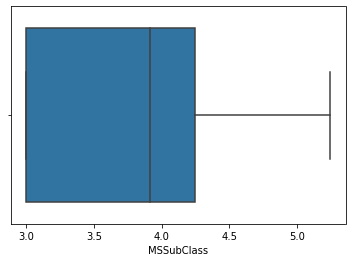

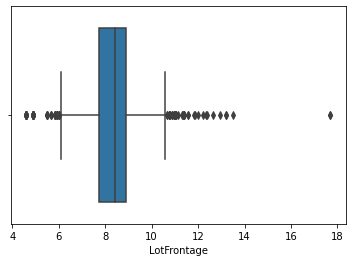

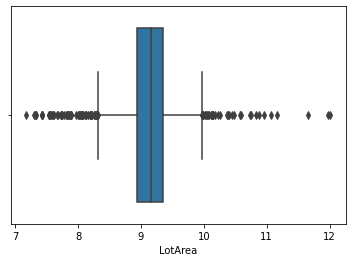

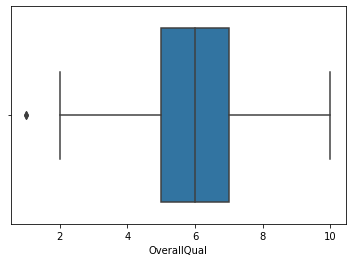

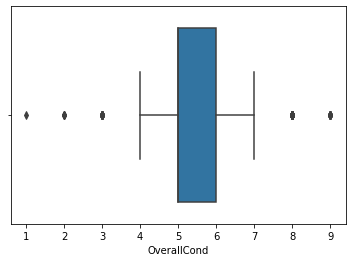

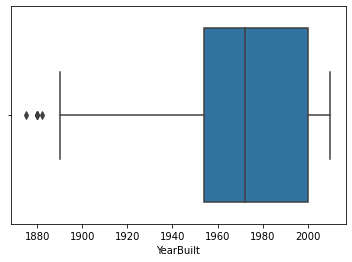

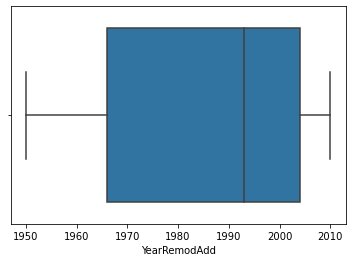

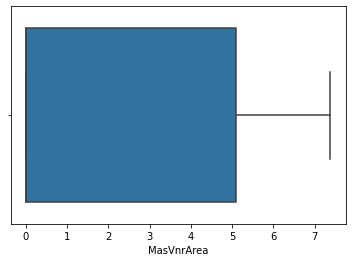

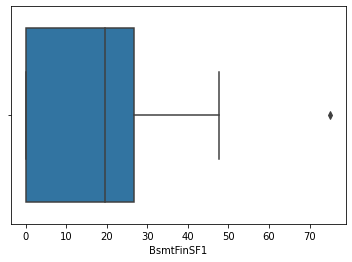

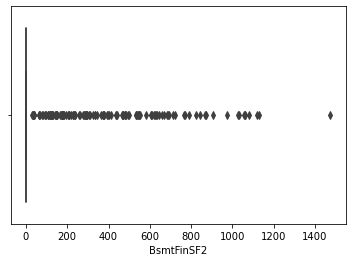

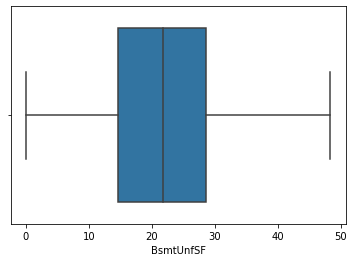

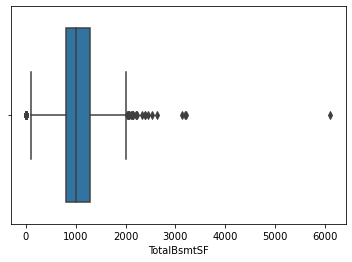

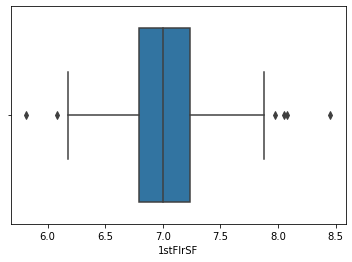

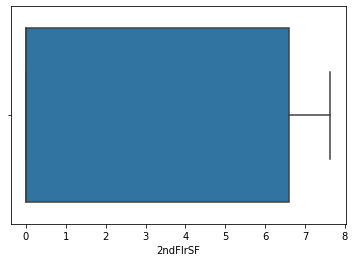

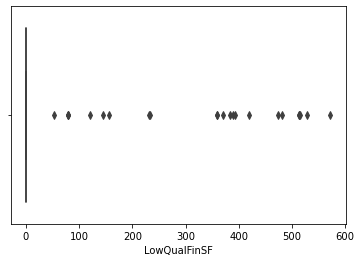

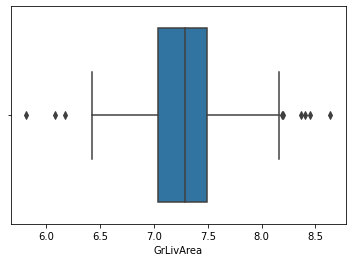

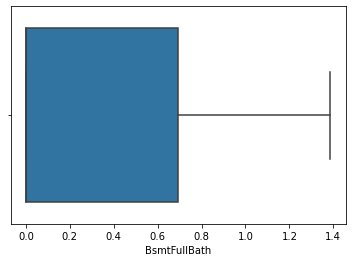

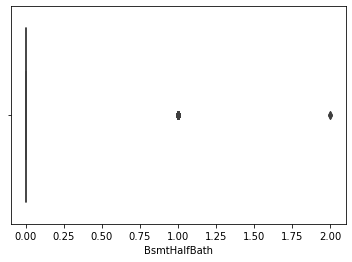

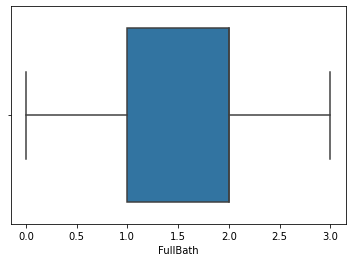

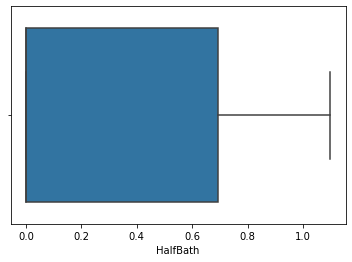

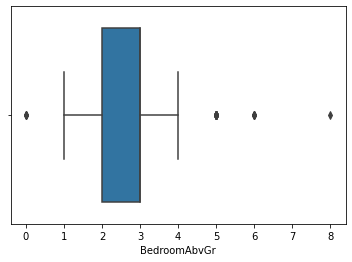

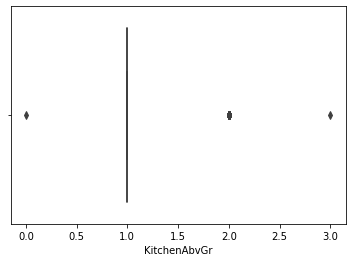

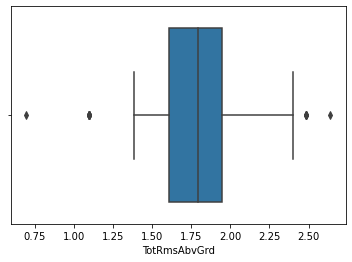

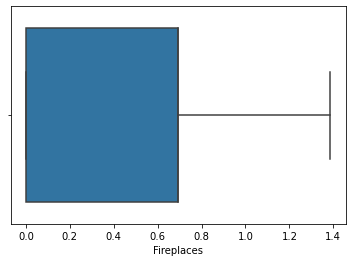

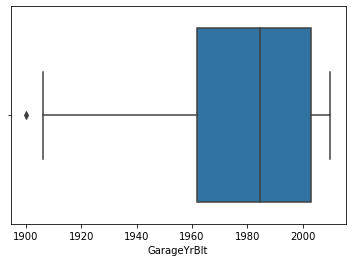

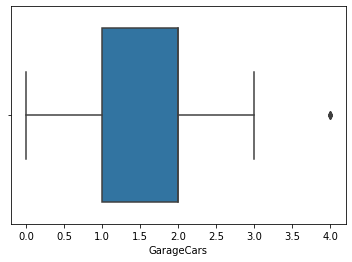

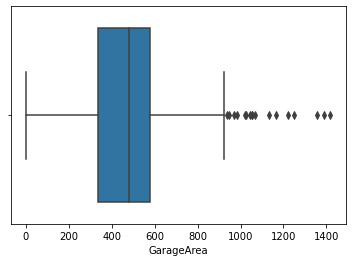

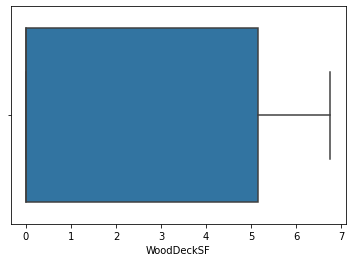

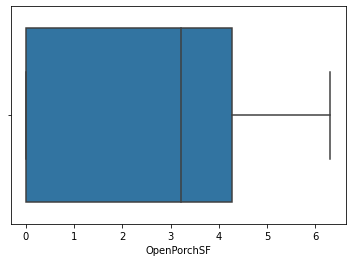

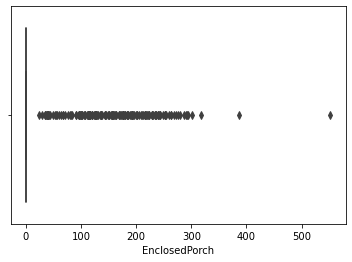

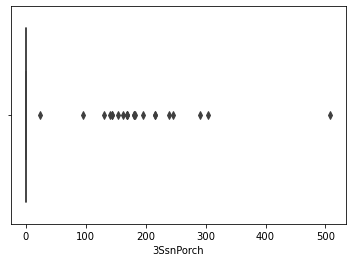

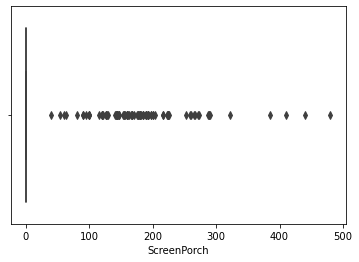

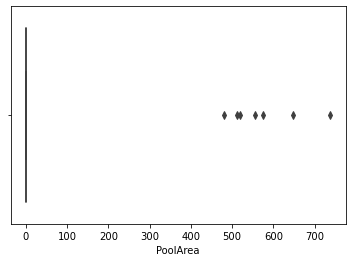

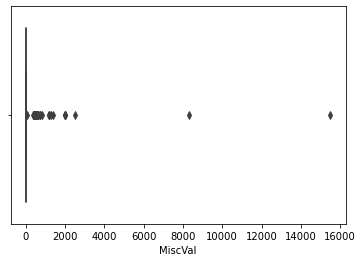

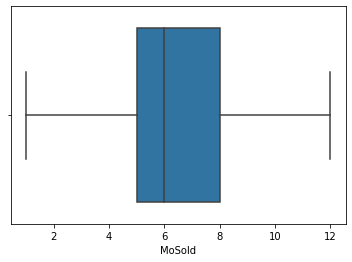

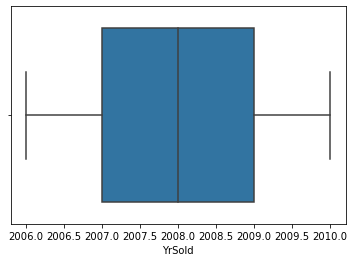

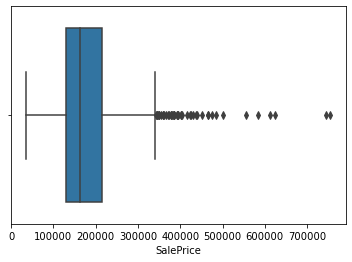

In [31]:
for i in df.describe().columns:
    sns.boxplot(df[i].dropna())
    plt.show()

In [32]:
num_train = df.select_dtypes(include=["number"])
cat_train = df.select_dtypes(exclude=["number"])

In [36]:
Q1 = num_train.quantile(0.02)
Q3 = num_train.quantile(0.98)
IQR = Q3 - Q1
idx = ~((num_train < (Q1 - 1.5 * IQR)) | (num_train > (Q3 + 1.5 * IQR))).any(axis=1)
df = pd.concat([num_train.loc[idx], cat_train.loc[idx]], axis=1)

In [37]:
df.shape

(1110, 75)

Encoding

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
le=LabelEncoder()

In [40]:
df['MasVnrType']=le.fit_transform(df['MasVnrType'].values.reshape(-1,1))
df['BsmtQual']=le.fit_transform(df['BsmtQual'].values.reshape(-1,1))
df['BsmtCond']=le.fit_transform(df['BsmtCond'].values.reshape(-1,1))
df['BsmtExposure']=le.fit_transform(df['BsmtExposure'].values.reshape(-1,1))
df['BsmtFinType1']=le.fit_transform(df['BsmtFinType1'].values.reshape(-1,1))
df['BsmtFinType2']=le.fit_transform(df['BsmtFinType2'].values.reshape(-1,1))
df['FireplaceQu']=le.fit_transform(df['FireplaceQu'].values.reshape(-1,1))
df['GarageType']=le.fit_transform(df['GarageType'].values.reshape(-1,1))
df['GarageYrBlt']=le.fit_transform(df['GarageYrBlt'].values.reshape(-1,1))
df['GarageFinish']=le.fit_transform(df['GarageFinish'].values.reshape(-1,1))
df['GarageQual']=le.fit_transform(df['GarageQual'].values.reshape(-1,1))
df['GarageCond']=le.fit_transform(df['GarageCond'].values.reshape(-1,1))
df['MSZoning']=le.fit_transform(df['MSZoning'].values.reshape(-1,1))
df['Street']=le.fit_transform(df['Street'].values.reshape(-1,1))
df['LotShape']=le.fit_transform(df['LotShape'].values.reshape(-1,1))
df['LandContour']=le.fit_transform(df['LandContour'].values.reshape(-1,1))
df['LotConfig']=le.fit_transform(df['LotConfig'].values.reshape(-1,1))
df['LandSlope']=le.fit_transform(df['LandSlope'].values.reshape(-1,1))
df['Neighborhood']=le.fit_transform(df['Neighborhood'].values.reshape(-1,1))
df['Condition1']=le.fit_transform(df['Condition1'].values.reshape(-1,1))
df['Condition2']=le.fit_transform(df['Condition2'].values.reshape(-1,1))
df['BldgType']=le.fit_transform(df['BldgType'].values.reshape(-1,1))
df['HouseStyle']=le.fit_transform(df['HouseStyle'].values.reshape(-1,1))
df['RoofStyle']=le.fit_transform(df['RoofStyle'].values.reshape(-1,1))
df['RoofMatl']=le.fit_transform(df['RoofMatl'].values.reshape(-1,1))
df['Exterior1st']=le.fit_transform(df['Exterior1st'].values.reshape(-1,1))
df['Exterior2nd']=le.fit_transform(df['Exterior2nd'].values.reshape(-1,1))
df['ExterQual']=le.fit_transform(df['ExterQual'].values.reshape(-1,1))
df['ExterCond']=le.fit_transform(df['ExterCond'].values.reshape(-1,1))
df['Foundation']=le.fit_transform(df['Foundation'].values.reshape(-1,1))
df['Heating']=le.fit_transform(df['Heating'].values.reshape(-1,1))
df['HeatingQC']=le.fit_transform(df['HeatingQC'].values.reshape(-1,1))
df['CentralAir']=le.fit_transform(df['CentralAir'].values.reshape(-1,1))
df['Electrical']=le.fit_transform(df['Electrical'].values.reshape(-1,1))
df['HouseStyle']=le.fit_transform(df['HouseStyle'].values.reshape(-1,1))
df['KitchenQual']=le.fit_transform(df['KitchenQual'].values.reshape(-1,1))
df['RoofMatl']=le.fit_transform(df['RoofMatl'].values.reshape(-1,1))
df['Exterior1st']=le.fit_transform(df['Exterior1st'].values.reshape(-1,1))
df['Exterior2nd']=le.fit_transform(df['Exterior2nd'].values.reshape(-1,1))
df['ExterQual']=le.fit_transform(df['ExterQual'].values.reshape(-1,1))
df['ExterCond']=le.fit_transform(df['ExterCond'].values.reshape(-1,1))
df['Foundation']=le.fit_transform(df['Foundation'].values.reshape(-1,1))
df['Heating']=le.fit_transform(df['Heating'].values.reshape(-1,1))
df['HeatingQC']=le.fit_transform(df['HeatingQC'].values.reshape(-1,1))
df['CentralAir']=le.fit_transform(df['CentralAir'].values.reshape(-1,1))
df['Electrical']=le.fit_transform(df['Electrical'].values.reshape(-1,1))
df['HouseStyle']=le.fit_transform(df['HouseStyle'].values.reshape(-1,1))
df['KitchenQual']=le.fit_transform(df['KitchenQual'].values.reshape(-1,1))
df['Functional']=le.fit_transform(df['Functional'].values.reshape(-1,1))
df['GarageFinish']=le.fit_transform(df['GarageFinish'].values.reshape(-1,1))
df['PavedDrive']=le.fit_transform(df['PavedDrive'].values.reshape(-1,1))
df['SaleType']=le.fit_transform(df['SaleType'].values.reshape(-1,1))
df['SaleCondition']=le.fit_transform(df['SaleCondition'].values.reshape(-1,1))

In [41]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,4.787492,8.425466,8.502689,6,5,1976,1976,0.000000,10.954451,0,30.951575,1078,6.864848,0.000000,0,6.864848,0.000000,0,2,0.000000,2,1,1.609438,0.693147,63,2,440,0.000000,5.327876,0,0,0,0,0,2,2007,128000,3,1,0,3,4,0,13,2,2,4,2,1,0,8,9,2,3,4,1,2,3,3,0,5,1,4,1,4,3,6,4,1,1,4,4,2,8,4
1,2.995732,9.746794,9.671871,8,6,1970,1970,0.000000,18.734994,823,32.295511,2217,7.703910,0.000000,0,7.703910,0.693147,0,2,0.000000,4,1,2.079442,0.693147,56,2,621,4.406719,5.337538,0,0,224,0,0,10,2007,268000,3,1,0,3,4,1,12,2,2,0,2,0,3,12,13,2,2,2,2,3,1,1,0,4,1,0,1,4,2,6,4,1,2,4,4,2,8,4
2,4.094345,9.591663,9.202308,7,5,1996,1997,0.000000,29.359837,0,15.968719,1117,7.027315,6.787845,0,7.607381,0.693147,0,2,0.693147,3,1,2.079442,0.693147,83,2,455,5.198497,4.875197,0,0,0,0,0,6,2007,269790,3,1,0,3,1,0,15,2,2,0,5,1,0,7,7,2,2,4,2,2,3,0,2,5,1,0,1,4,3,6,4,1,2,4,4,2,8,4
3,2.995732,10.246951,9.371694,6,6,1977,1977,6.175867,26.551836,0,33.749074,1844,7.519692,0.000000,0,7.519692,0.000000,0,2,0.000000,3,1,1.945910,0.693147,63,2,546,0.000000,4.812184,0,0,0,0,0,1,2010,190000,3,1,0,3,4,0,14,2,2,0,2,3,0,8,9,1,3,4,1,2,3,3,1,5,1,0,1,4,3,6,4,1,1,4,4,2,0,4
4,2.995732,8.425466,9.719264,6,7,1977,2000,4.844187,35.298725,0,18.867962,1602,7.379008,0.000000,0,7.379008,0.000000,1,2,0.000000,3,1,2.079442,0.693147,63,2,529,5.484797,0.000000,0,0,0,0,0,6,2009,215000,3,1,0,3,2,0,14,2,2,0,2,1,0,4,4,3,2,4,1,2,3,3,0,5,1,2,1,4,2,6,4,1,0,4,4,2,8,4


In [42]:
#So now we handled all the categorical data to numerical data.

Scaling

In [43]:
#Here I'm going to use sklearn_minmax_scaler for scaling.

In [44]:
#first we will split the data into x(independent) and y (target) variables.

In [45]:
x=df.drop(['SalePrice'],axis=1)
y=df['SalePrice']

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
se=MinMaxScaler()

In [48]:
x=se.fit_transform(x)
x=pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73
0,0.795881,0.293144,0.275238,0.555556,0.500,0.748148,0.433333,0.000000,0.230429,0.000000,0.640393,0.336245,0.464500,0.000000,0.0,0.399274,0.0,0.0,0.666667,0.00000,0.333333,0.333333,0.511392,0.5,0.656250,0.5,0.316547,0.000000,0.844853,0.0,0.0,0.000000,0.0,0.0,0.090909,0.25,0.75,1.0,0.0,1.0,1.00,0.0,0.541667,0.25,0.333333,1.0,0.285714,0.2,0.0,0.615385,0.642857,0.666667,1.000000,1.0,0.2,0.666667,1.000000,1.000000,0.0,1.0,0.2,1.0,1.0,1.0,1.000000,1.0,1.0,0.2,0.5,1.0,1.0,1.0,1.0,0.8
1,0.000000,0.393938,0.516729,0.777778,0.625,0.703704,0.333333,0.000000,0.394094,0.558345,0.668199,0.691516,0.834379,0.000000,0.0,0.717214,0.5,0.0,0.666667,0.00000,0.666667,0.333333,0.773706,0.5,0.583333,0.5,0.446763,0.652402,0.846385,0.0,0.0,0.466667,0.0,0.0,0.818182,0.25,0.75,1.0,0.0,1.0,1.00,0.5,0.500000,0.25,0.333333,0.0,0.285714,0.0,0.6,0.923077,0.928571,0.666667,0.666667,0.5,0.4,1.000000,0.333333,0.333333,0.0,0.8,0.2,0.0,1.0,1.0,0.666667,1.0,1.0,0.2,1.0,1.0,1.0,1.0,1.0,0.8
2,0.487992,0.382104,0.419742,0.666667,0.500,0.896296,0.783333,0.000000,0.617589,0.000000,0.330395,0.348409,0.536119,0.900807,0.0,0.680637,0.5,0.0,0.666667,0.63093,0.500000,0.333333,0.773706,0.5,0.864583,0.5,0.327338,0.769623,0.773071,0.0,0.0,0.000000,0.0,0.0,0.454545,0.25,0.75,1.0,0.0,1.0,0.25,0.0,0.625000,0.25,0.333333,0.0,0.714286,0.2,0.0,0.538462,0.500000,0.666667,0.666667,1.0,0.4,0.666667,1.000000,0.000000,0.4,1.0,0.2,0.0,1.0,1.0,1.000000,1.0,1.0,0.2,1.0,1.0,1.0,1.0,1.0,0.8
3,0.000000,0.432091,0.454728,0.555556,0.625,0.755556,0.450000,0.837022,0.558522,0.000000,0.698273,0.575172,0.753171,0.000000,0.0,0.647410,0.0,0.0,0.666667,0.00000,0.500000,0.333333,0.699180,0.5,0.656250,0.5,0.392806,0.000000,0.763079,0.0,0.0,0.000000,0.0,0.0,0.000000,1.00,0.75,1.0,0.0,1.0,1.00,0.0,0.583333,0.25,0.333333,0.0,0.285714,0.6,0.0,0.615385,0.642857,0.333333,1.000000,1.0,0.2,0.666667,1.000000,1.000000,0.2,1.0,0.2,0.0,1.0,1.0,1.000000,1.0,1.0,0.2,0.5,1.0,1.0,1.0,0.0,0.8
4,0.000000,0.293144,0.526518,0.555556,0.750,0.755556,0.833333,0.656538,0.742514,0.000000,0.390381,0.499688,0.691154,0.000000,0.0,0.594101,0.0,0.5,0.666667,0.00000,0.500000,0.333333,0.773706,0.5,0.656250,0.5,0.380576,0.812009,0.000000,0.0,0.0,0.000000,0.0,0.0,0.454545,0.75,0.75,1.0,0.0,1.0,0.50,0.0,0.583333,0.25,0.333333,0.0,0.285714,0.2,0.0,0.307692,0.285714,1.000000,0.666667,1.0,0.2,0.666667,1.000000,1.000000,0.0,1.0,0.2,0.5,1.0,1.0,0.666667,1.0,1.0,0.2,0.0,1.0,1.0,1.0,1.0,0.8


Import required Machine Learning Libraries.

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [50]:
lr=LinearRegression()
dr=DecisionTreeRegressor()
rf=RandomForestRegressor()
kn=KNeighborsRegressor()

In [51]:
model=[lr,dr,rf,kn]

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=40)

In [53]:
#we will use for loop and we will train the data with all the above mentioned machinelearning algorithms.From this we will get r2_score and mean_absolute, mean_squared error values.

In [54]:
for m in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=34)
    m.fit(x_train,y_train)
    predv=m.predict(x_test)
    print(m)
    print('r2_score:',r2_score(y_test,predv))
    print('mean_squared_error:',mean_squared_error(y_test,predv))
    print('mean_absolute_error:',mean_absolute_error(y_test,predv))
    print('root_mean_squared_error',np.sqrt(mean_squared_error(y_test,predv)))
    print('\n')

LinearRegression()
r2_score: 0.7608932648566944
mean_squared_error: 1364865990.6648505
mean_absolute_error: 22308.658437139402
root_mean_squared_error 36944.09277089979


DecisionTreeRegressor()
r2_score: 0.7415438693176102
mean_squared_error: 1475315961.4504504
mean_absolute_error: 27391.774774774774
root_mean_squared_error 38409.84198679357


RandomForestRegressor()
r2_score: 0.8335847025166532
mean_squared_error: 949929661.0162978
mean_absolute_error: 19762.568168168167
root_mean_squared_error 30820.92894473328


KNeighborsRegressor()
r2_score: 0.7071005448985235
mean_squared_error: 1671924902.9630027
mean_absolute_error: 25650.15915915916
root_mean_squared_error 40889.17831117425




Required Liabraries for Regulariation.

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

In [56]:
#Here Grid search cv is to find best parameters for the Lasso regularization.
#Cross_val_score is crossvalidation technique.
#Cross-validation is a technique used to protect against overfitting in a predictive model, particularly in a case where the amount of data may be limited. 
#In cross-validation, you make a fixed number of K-folds (or partitions) of the data, run the analysis on each fold, and then average (mean) the overall error estimate.

In [57]:
#let's find best alpha value for the lasso.

In [58]:
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [59]:
#Now we will use the above alpha and random_state best parameters for lasso and willcheck the r2_score.#Now we will use the above alpha and random_state best parameters for lasso and willcheck the r2_score.

In [60]:
ls=Lasso(alpha=10,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pre=ls.predict(x_test)
lss=r2_score(y_test,pre)
lss

0.7742264854970851

In [61]:
#let's do cross validation for this regularization.

In [62]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8274996822330065

Hyper parameter Tunning.

In [64]:
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2'],'max_depth':[10,20,30]}
gd=GridSearchCV(estimator=rf,param_grid=parameters,scoring='r2',cv=5)
gd.fit(x_train,y_train)
best_parameter=gd.best_params_
print('best_parameter:',best_parameter)

best_parameter: {'criterion': 'mae', 'max_depth': 20, 'max_features': 'sqrt'}


In [65]:
#we got best parameters.now with the help of these best parameters we will get the r2_score.

In [66]:
gd_pred=gd.best_estimator_.predict(x_test)

In [67]:
r2_score(y_test,gd_pred)

0.8419968875955791

In [68]:
print('root_mean_squared_error',np.sqrt(mean_squared_error(y_test,gd_pred)))

root_mean_squared_error 30031.83867711618


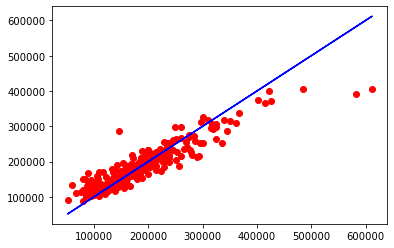

In [69]:
plt.scatter(x=y_test,y=gd_pred,color='r')
plt.plot(y_test,y_test,color='b')

In [70]:
import joblib
joblib.dump(gd.best_estimator_,'house_price.obj')

['house_price.obj']

Load the Test data.

In [71]:
test_data=pd.read_csv('house_test.csv')

In [72]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,468.0,TA,TA,PConc,Gd,TA,No,GLQ,33,Unf,0,1530,1563,GasA,Ex,Y,SBrkr,1563,0,0,1563,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2007.0,RFn,3,758,TA,TA,Y,144,99,0,0,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,686,Unf,0,304,990,GasA,Ex,Y,SBrkr,990,0,0,990,0,1,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1996.0,Unf,2,672,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,6,7,1947,1950,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,399,Unf,0,605,1004,GasA,Ex,Y,SBrkr,1004,660,0,1664,0,0,2,0,3,1,TA,7,Typ,2,Gd,Detchd,1950.0,Unf

In [73]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [74]:
#so we have to do imputation to handle these columns.

In [75]:
#handling numerical data for missing  values

In [76]:
imp= SimpleImputer(missing_values=np.nan, strategy='mean')

In [77]:
test_data['LotFrontage']=imp.fit_transform(test_data['LotFrontage'].values.reshape(-1,1))
test_data['MasVnrArea']=imp.fit_transform(test_data['MasVnrArea'].values.reshape(-1,1))

In [78]:
#handling categorical data for missing  values

In [79]:
imp= SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [80]:
test_data['MasVnrType']=imp.fit_transform(test_data['MasVnrType'].values.reshape(-1,1))
test_data['BsmtQual']=imp.fit_transform(test_data['BsmtQual'].values.reshape(-1,1))
test_data['BsmtCond']=imp.fit_transform(test_data['BsmtCond'].values.reshape(-1,1))
test_data['BsmtExposure']=imp.fit_transform(test_data['BsmtExposure'].values.reshape(-1,1))
test_data['BsmtFinType1']=imp.fit_transform(test_data['BsmtFinType1'].values.reshape(-1,1))
test_data['BsmtFinType2']=imp.fit_transform(test_data['BsmtFinType2'].values.reshape(-1,1))
test_data['FireplaceQu']=imp.fit_transform(test_data['FireplaceQu'].values.reshape(-1,1))
test_data['GarageType']=imp.fit_transform(test_data['GarageType'].values.reshape(-1,1))
test_data['GarageYrBlt']=imp.fit_transform(test_data['GarageYrBlt'].values.reshape(-1,1))
test_data['GarageFinish']=imp.fit_transform(test_data['GarageFinish'].values.reshape(-1,1))
test_data['GarageQual']=imp.fit_transform(test_data['GarageQual'].values.reshape(-1,1))
test_data['GarageCond']=imp.fit_transform(test_data['GarageCond'].values.reshape(-1,1))
test_data['Electrical']=imp.fit_transform(test_data['Electrical'].values.reshape(-1,1))

In [81]:
#Removing columns 'Id','PoolQC','Fence','MiscFeature','Alley','Utilities' because we removed same columns in trained data.

In [82]:
test_data.drop(['Id','PoolQC','Fence','MiscFeature','Alley','Utilities'],axis=1,inplace=True)

Let's check skewness

In [83]:
test_data.skew()

MSSubClass        1.358597
LotFrontage       0.466813
LotArea          12.781805
OverallQual       0.397312
OverallCond       1.209714
YearBuilt        -0.755233
YearRemodAdd     -0.535600
MasVnrArea        1.976804
BsmtFinSF1        0.739790
BsmtFinSF2        3.698543
BsmtUnfSF         0.960708
TotalBsmtSF       0.519257
1stFlrSF          0.692047
2ndFlrSF          0.765511
LowQualFinSF     10.929928
GrLivArea         1.010586
BsmtFullBath      0.463685
BsmtHalfBath      3.544994
FullBath         -0.049800
HalfBath          0.758892
BedroomAbvGr      0.075315
KitchenAbvGr      4.849432
TotRmsAbvGrd      0.805535
Fireplaces        0.540164
GarageYrBlt      -0.742835
GarageCars       -0.280324
GarageArea        0.133547
WoodDeckSF        1.708221
OpenPorchSF       2.185030
EnclosedPorch     3.177046
3SsnPorch        12.277476
ScreenPorch       4.182351
PoolArea          0.000000
MiscVal          13.264758
MoSold            0.186504
YrSold            0.018412
dtype: float64

In [84]:
test_data['MSSubClass']=np.log(test_data['MSSubClass'])
test_data['LotArea']=np.log(test_data['LotArea'])
test_data['MasVnrArea']=np.log(test_data['MasVnrArea']+1)
test_data['1stFlrSF']=np.log(test_data['1stFlrSF'])
test_data['2ndFlrSF']=np.log(test_data['2ndFlrSF']+1)
test_data['GrLivArea']=np.log(test_data['GrLivArea'])
test_data['TotRmsAbvGrd']=np.log(test_data['TotRmsAbvGrd'])
test_data['Fireplaces']=np.log(test_data['Fireplaces']+1)
test_data['WoodDeckSF']=np.log(test_data['WoodDeckSF']+1)
test_data['OpenPorchSF']=np.log(test_data['OpenPorchSF']+1)
test_data['BsmtFullBath']=np.log(test_data['BsmtFullBath']+1)
test_data['HalfBath']=np.log(test_data['HalfBath']+1)


In [85]:
test_data['LotFrontage']=np.sqrt(test_data['LotFrontage'])
test_data['BsmtFinSF1']=np.sqrt(test_data['BsmtFinSF1'])
test_data['BsmtUnfSF']=np.sqrt(test_data['BsmtUnfSF'])

In [86]:
test_data.skew()

MSSubClass        0.285518
LotFrontage      -0.338644
LotArea          -0.017127
OverallQual       0.397312
OverallCond       1.209714
YearBuilt        -0.755233
YearRemodAdd     -0.535600
MasVnrArea        0.430851
BsmtFinSF1       -0.107664
BsmtFinSF2        3.698543
BsmtUnfSF        -0.305887
TotalBsmtSF       0.519257
1stFlrSF         -0.013959
2ndFlrSF          0.292337
LowQualFinSF     10.929928
GrLivArea        -0.022754
BsmtFullBath      0.373521
BsmtHalfBath      3.544994
FullBath         -0.049800
HalfBath          0.661487
BedroomAbvGr      0.075315
KitchenAbvGr      4.849432
TotRmsAbvGrd     -0.113739
Fireplaces        0.153695
GarageYrBlt      -0.742835
GarageCars       -0.280324
GarageArea        0.133547
WoodDeckSF        0.244705
OpenPorchSF      -0.100802
EnclosedPorch     3.177046
3SsnPorch        12.277476
ScreenPorch       4.182351
PoolArea          0.000000
MiscVal          13.264758
MoSold            0.186504
YrSold            0.018412
dtype: float64

Treating outliers

In [87]:
num_train = test_data.select_dtypes(include=["number"])
cat_train = test_data.select_dtypes(exclude=["number"])

In [88]:
Q1 = num_train.quantile(0.02)
Q3 = num_train.quantile(0.98)
IQR = Q3 - Q1
idx = ~((num_train < (Q1 - 1.5 * IQR)) | (num_train > (Q3 + 1.5 * IQR))).any(axis=1)
test_data = pd.concat([num_train.loc[idx], cat_train.loc[idx]], axis=1)

In [89]:
test_data.shape

(286, 74)

Encoding

In [90]:
from sklearn.preprocessing import LabelEncoder

In [91]:
le=LabelEncoder()

In [92]:
test_data['MasVnrType']=le.fit_transform(test_data['MasVnrType'].values.reshape(-1,1))
test_data['BsmtQual']=le.fit_transform(test_data['BsmtQual'].values.reshape(-1,1))
test_data['BsmtCond']=le.fit_transform(test_data['BsmtCond'].values.reshape(-1,1))
test_data['BsmtExposure']=le.fit_transform(test_data['BsmtExposure'].values.reshape(-1,1))
test_data['BsmtFinType1']=le.fit_transform(test_data['BsmtFinType1'].values.reshape(-1,1))
test_data['BsmtFinType2']=le.fit_transform(test_data['BsmtFinType2'].values.reshape(-1,1))
test_data['FireplaceQu']=le.fit_transform(test_data['FireplaceQu'].values.reshape(-1,1))
test_data['GarageType']=le.fit_transform(test_data['GarageType'].values.reshape(-1,1))
test_data['GarageYrBlt']=le.fit_transform(test_data['GarageYrBlt'].values.reshape(-1,1))
test_data['GarageFinish']=le.fit_transform(test_data['GarageFinish'].values.reshape(-1,1))
test_data['GarageQual']=le.fit_transform(test_data['GarageQual'].values.reshape(-1,1))
test_data['GarageCond']=le.fit_transform(test_data['GarageCond'].values.reshape(-1,1))
test_data['MSZoning']=le.fit_transform(test_data['MSZoning'].values.reshape(-1,1))
test_data['Street']=le.fit_transform(test_data['Street'].values.reshape(-1,1))
test_data['LotShape']=le.fit_transform(test_data['LotShape'].values.reshape(-1,1))
test_data['LandContour']=le.fit_transform(test_data['LandContour'].values.reshape(-1,1))
test_data['LotConfig']=le.fit_transform(test_data['LotConfig'].values.reshape(-1,1))
test_data['LandSlope']=le.fit_transform(test_data['LandSlope'].values.reshape(-1,1))
test_data['Neighborhood']=le.fit_transform(test_data['Neighborhood'].values.reshape(-1,1))
test_data['Condition1']=le.fit_transform(test_data['Condition1'].values.reshape(-1,1))
test_data['Condition2']=le.fit_transform(test_data['Condition2'].values.reshape(-1,1))
test_data['BldgType']=le.fit_transform(test_data['BldgType'].values.reshape(-1,1))
test_data['HouseStyle']=le.fit_transform(test_data['HouseStyle'].values.reshape(-1,1))
test_data['RoofStyle']=le.fit_transform(test_data['RoofStyle'].values.reshape(-1,1))
test_data['RoofMatl']=le.fit_transform(test_data['RoofMatl'].values.reshape(-1,1))
test_data['Exterior1st']=le.fit_transform(test_data['Exterior1st'].values.reshape(-1,1))
test_data['Exterior2nd']=le.fit_transform(test_data['Exterior2nd'].values.reshape(-1,1))
test_data['ExterQual']=le.fit_transform(test_data['ExterQual'].values.reshape(-1,1))
test_data['ExterCond']=le.fit_transform(test_data['ExterCond'].values.reshape(-1,1))
test_data['Foundation']=le.fit_transform(test_data['Foundation'].values.reshape(-1,1))
test_data['Heating']=le.fit_transform(test_data['Heating'].values.reshape(-1,1))
test_data['HeatingQC']=le.fit_transform(test_data['HeatingQC'].values.reshape(-1,1))
test_data['CentralAir']=le.fit_transform(test_data['CentralAir'].values.reshape(-1,1))
test_data['Electrical']=le.fit_transform(test_data['Electrical'].values.reshape(-1,1))
test_data['HouseStyle']=le.fit_transform(test_data['HouseStyle'].values.reshape(-1,1))
test_data['KitchenQual']=le.fit_transform(test_data['KitchenQual'].values.reshape(-1,1))
test_data['RoofMatl']=le.fit_transform(test_data['RoofMatl'].values.reshape(-1,1))
test_data['Exterior1st']=le.fit_transform(test_data['Exterior1st'].values.reshape(-1,1))
test_data['Exterior2nd']=le.fit_transform(test_data['Exterior2nd'].values.reshape(-1,1))
test_data['ExterQual']=le.fit_transform(test_data['ExterQual'].values.reshape(-1,1))
test_data['ExterCond']=le.fit_transform(test_data['ExterCond'].values.reshape(-1,1))
test_data['Foundation']=le.fit_transform(test_data['Foundation'].values.reshape(-1,1))
test_data['Heating']=le.fit_transform(test_data['Heating'].values.reshape(-1,1))
test_data['HeatingQC']=le.fit_transform(test_data['HeatingQC'].values.reshape(-1,1))
test_data['CentralAir']=le.fit_transform(test_data['CentralAir'].values.reshape(-1,1))
test_data['Electrical']=le.fit_transform(test_data['Electrical'].values.reshape(-1,1))
test_data['HouseStyle']=le.fit_transform(test_data['HouseStyle'].values.reshape(-1,1))
test_data['KitchenQual']=le.fit_transform(test_data['KitchenQual'].values.reshape(-1,1))
test_data['Functional']=le.fit_transform(test_data['Functional'].values.reshape(-1,1))
test_data['GarageFinish']=le.fit_transform(test_data['GarageFinish'].values.reshape(-1,1))
test_data['PavedDrive']=le.fit_transform(test_data['PavedDrive'].values.reshape(-1,1))
test_data['SaleType']=le.fit_transform(test_data['SaleType'].values.reshape(-1,1))
test_data['SaleCondition']=le.fit_transform(test_data['SaleCondition'].values.reshape(-1,1))

In [93]:
test_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,2.995732,9.273618,9.557964,9,5,2005,2006,5.303305,35.341194,0,25.942244,1922,7.561122,0.000000,0,7.561122,0.693147,0,2,0.000000,3,1,2.079442,0.693147,65,3,676,5.187386,3.951244,0,0,0,0,0,7,2007,2,1,0,1,0,0,21,2,0,0,2,3,0,9,11,3,2,3,2,0,2,1,2,5,0,0,1,3,2,5,2,1,0,4,4,2,5,2
1,4.787492,8.150160,8.668024,8,5,1984,1984,0.000000,32.186954,0,13.564660,1220,7.215240,0.000000,0,7.215240,0.693147,0,1,0.000000,1,1,1.386294,0.693147,45,2,565,4.158883,0.000000,0,0,0,0,0,8,2009,2,1,0,3,1,0,21,2,0,4,2,1,0,5,5,2,2,3,1,2,2,0,2,5,0,2,1,3,2,5,0,1,1,4,4,2,0,0
2,2.995732,8.150160,9.379070,8,5,2001,2001,0.000000,0.000000,0,41.868843,1753,7.488853,0.000000,0,7.488853,0.000000,0,2,0.000000,3,1,1.945910,0.693147,61,2,522,5.313206,5.023881,0,0,0,0,0,6,2009,2,1,3,3,4,0,4,2,0,0,2,3,0,9,11,2,2,3,2,2,2,0,5,5,0,0,1,3,0,5,4,1,1,4,4,2,5,2
3,4.248495,8.660254,9.392662,7,7,1941,1950,0.000000,16.583124,0,20.712315,704,6.756932,6.558198,0,7.355002,0.000000,0,1,0.693147,3,1,1.945910,0.693147,12,1,234,0.000000,0.000000,0,0,0,0,0,7,2009,2,1,3,0,4,0,5,2,0,0,4,1,0,6,7,2,3,3,1,3,2,3,4,5,0,0,1,3,1,5,2,1,2,4,4,2,5,2
4,4.094345,9.273618,9.588640,6,5,2007,2007,4.317488,0.000000,0,29.899833,894,6.795706,6.946976,0,7.566828,0.000000,0,2,0.693147,4,1,2.197225,0.693147,67,3,668,4.615121,2.944439,0,0,0,0,0,1,2008,2,1,0,3,1,0,20,1,0,0,4,1,0,9,11,3,2,3,2,2,2,2,5,5,0,0,1,3,2,5,2,3,0,4,4,2,5,2


Scaling

In [94]:
se=MinMaxScaler()

In [95]:
test_data_new=se.fit_transform(test_data)
test_data_new=pd.DataFrame(test_data_new,columns=test_data.columns)
test_data_new.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,0.000000,0.612018,0.450091,0.857143,0.333333,0.967742,0.933333,0.764247,0.840742,0.0,0.589749,0.621202,0.861016,0.000000,0.0,0.691166,0.63093,0.0,0.666667,0.00000,0.500000,0.0,0.707519,0.63093,0.928571,0.75,0.642586,0.786960,0.654410,0.0,0.0,0.0,0.0,0.0,0.545455,0.25,0.666667,1.0,0.0,0.333333,0.00,0.0,0.913043,0.285714,0.0,0.0,0.333333,0.75,0.0,0.818182,0.846154,1.000000,0.666667,1.0,0.4,0.000000,1.0,0.333333,0.4,1.0,0.0,0.000000,1.0,1.0,0.666667,1.0,0.5,0.2,0.0,1.0,1.0,1.0,1.0,0.666667
1,0.795881,0.465446,0.270274,0.714286,0.333333,0.798387,0.566667,0.000000,0.765705,0.0,0.308367,0.394312,0.645385,0.000000,0.0,0.508298,0.63093,0.0,0.333333,0.00000,0.166667,0.0,0.207519,0.63093,0.642857,0.50,0.537072,0.630930,0.000000,0.0,0.0,0.0,0.0,0.0,0.636364,0.75,0.666667,1.0,0.0,1.000000,0.25,0.0,0.913043,0.285714,0.0,1.0,0.333333,0.25,0.0,0.454545,0.384615,0.666667,0.666667,1.0,0.2,0.666667,1.0,0.000000,0.4,1.0,0.0,0.666667,1.0,1.0,0.666667,1.0,0.0,0.2,0.5,1.0,1.0,1.0,0.0,0.000000
2,0.000000,0.465446,0.413945,0.714286,0.333333,0.935484,0.850000,0.000000,0.000000,0.0,0.951810,0.566580,0.815962,0.000000,0.0,0.652958,0.00000,0.0,0.666667,0.00000,0.500000,0.0,0.611196,0.63093,0.871429,0.50,0.496198,0.806048,0.832062,0.0,0.0,0.0,0.0,0.0,0.454545,0.75,0.666667,1.0,1.0,1.000000,1.00,0.0,0.173913,0.285714,0.0,0.0,0.333333,0.75,0.0,0.818182,0.846154,0.666667,0.666667,1.0,0.4,0.666667,1.0,0.000000,1.0,1.0,0.0,0.000000,1.0,1.0,0.000000,1.0,1.0,0.2,0.5,1.0,1.0,1.0,1.0,0.666667
3,0.556464,0.531996,0.416691,0.571429,0.666667,0.451613,0.000000,0.000000,0.394501,0.0,0.470856,0.227537,0.359664,0.889671,0.0,0.582191,0.00000,0.0,0.333333,0.63093,0.500000,0.0,0.611196,0.63093,0.171429,0.25,0.222433,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.545455,0.75,0.666667,1.0,1.0,0.000000,1.00,0.0,0.217391,0.285714,0.0,0.0,0.666667,0.25,0.0,0.545455,0.538462,0.666667,1.000000,1.0,0.2,1.000000,1.0,1.000000,0.8,1.0,0.0,0.000000,1.0,1.0,0.333333,1.0,0.5,0.2,1.0,1.0,1.0,1.0,1.0,0.666667
4,0.487992,0.612018,0.456289,0.428571,0.333333,0.983871,0.950000,0.622183,0.000000,0.0,0.679717,0.288946,0.383836,0.942411,0.0,0.694183,0.00000,0.0,0.666667,0.63093,0.666667,0.0,0.792481,0.63093,0.957143,0.75,0.634981,0.700144,0.487662,0.0,0.0,0.0,0.0,0.0,0.000000,0.50,0.666667,1.0,0.0,1.000000,0.25,0.0,0.869565,0.142857,0.0,0.0,0.666667,0.25,0.0,0.818182,0.846154,1.000000,0.666667,1.0,0.4,0.666667,1.0,0.666667,1.0,1.0,0.0,0.000000,1.0,1.0,0.666667,1.0,0.5,0.6,0.0,1.0,1.0,1.0,1.0,0.666667


In [96]:
test_data_new=test_data

In [97]:
test_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,2.995732,9.273618,9.557964,9,5,2005,2006,5.303305,35.341194,0,25.942244,1922,7.561122,0.000000,0,7.561122,0.693147,0,2,0.000000,3,1,2.079442,0.693147,65,3,676,5.187386,3.951244,0,0,0,0,0,7,2007,2,1,0,1,0,0,21,2,0,0,2,3,0,9,11,3,2,3,2,0,2,1,2,5,0,0,1,3,2,5,2,1,0,4,4,2,5,2
1,4.787492,8.150160,8.668024,8,5,1984,1984,0.000000,32.186954,0,13.564660,1220,7.215240,0.000000,0,7.215240,0.693147,0,1,0.000000,1,1,1.386294,0.693147,45,2,565,4.158883,0.000000,0,0,0,0,0,8,2009,2,1,0,3,1,0,21,2,0,4,2,1,0,5,5,2,2,3,1,2,2,0,2,5,0,2,1,3,2,5,0,1,1,4,4,2,0,0
2,2.995732,8.150160,9.379070,8,5,2001,2001,0.000000,0.000000,0,41.868843,1753,7.488853,0.000000,0,7.488853,0.000000,0,2,0.000000,3,1,1.945910,0.693147,61,2,522,5.313206,5.023881,0,0,0,0,0,6,2009,2,1,3,3,4,0,4,2,0,0,2,3,0,9,11,2,2,3,2,2,2,0,5,5,0,0,1,3,0,5,4,1,1,4,4,2,5,2
3,4.248495,8.660254,9.392662,7,7,1941,1950,0.000000,16.583124,0,20.712315,704,6.756932,6.558198,0,7.355002,0.000000,0,1,0.693147,3,1,1.945910,0.693147,12,1,234,0.000000,0.000000,0,0,0,0,0,7,2009,2,1,3,0,4,0,5,2,0,0,4,1,0,6,7,2,3,3,1,3,2,3,4,5,0,0,1,3,1,5,2,1,2,4,4,2,5,2
4,4.094345,9.273618,9.588640,6,5,2007,2007,4.317488,0.000000,0,29.899833,894,6.795706,6.946976,0,7.566828,0.000000,0,2,0.693147,4,1,2.197225,0.693147,67,3,668,4.615121,2.944439,0,0,0,0,0,1,2008,2,1,0,3,1,0,20,1,0,0,4,1,0,9,11,3,2,3,2,2,2,2,5,5,0,0,1,3,2,5,2,3,0,4,4,2,5,2


In [98]:
test_data_house_prices=joblib.load('house_price.obj')
Predicted_sale_prices=test_data_house_prices.predict(test_data)

In [99]:
Predicted_sale_prices

array([379399.76, 322752.91, 328200.71, 336982.82, 374147.93, 262827.77,
       336454.15, 365290.56, 336983.04, 367164.57, 283327.14, 311003.53,
       292829.08, 346276.88, 348818.55, 323593.83, 273225.59, 306181.72,
       354763.6 , 327700.26, 331445.34, 338138.42, 335488.66, 292745.19,
       300219.79, 336965.23, 345346.42, 358501.08, 301810.09, 279979.66,
       334904.92, 331665.46, 325151.97, 291724.86, 329550.62, 361706.28,
       337059.98, 340810.03, 322782.81, 309027.92, 365139.17, 350036.07,
       316152.07, 313746.33, 317681.04, 297181.09, 282889.27, 336268.41,
       410789.07, 334011.23, 307065.85, 308068.35, 286129.68, 350852.75,
       296831.64, 324036.5 , 343553.39, 295648.72, 340519.54, 321436.25,
       352645.81, 322894.13, 341473.58, 336479.09, 316627.24, 319008.7 ,
       309161.33, 312134.2 , 324146.99, 371592.79, 334787.08, 312487.7 ,
       334688.57, 337255.15, 355763.73, 368551.59, 346543.74, 337787.92,
       332518.04, 375523.25, 328911.31, 321679.24, 

TASK COMPLETED